In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df_shap = pd.read_json("Exact_shap_detail.json", orient="records", lines=True)
df_shap_copies = pd.read_json("Exact_shap_detail_4Copies.json", orient="records", lines=True)
df_plot = df_shap[["scores", "doc_flags", "doc_list"]].copy()

## Visualisation

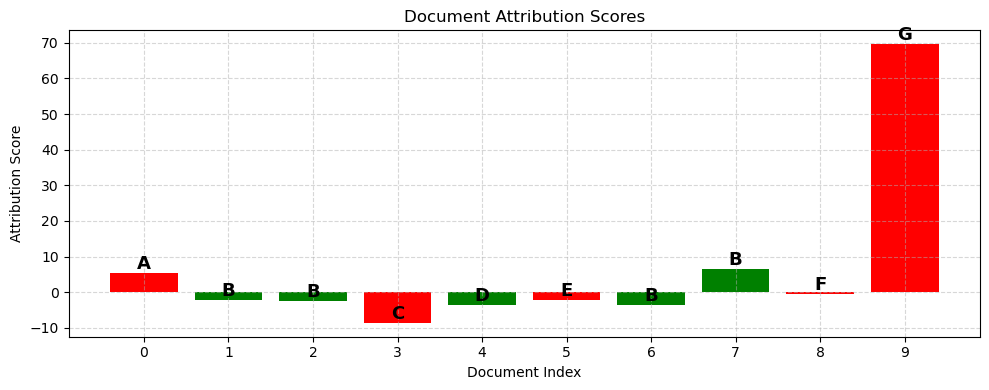

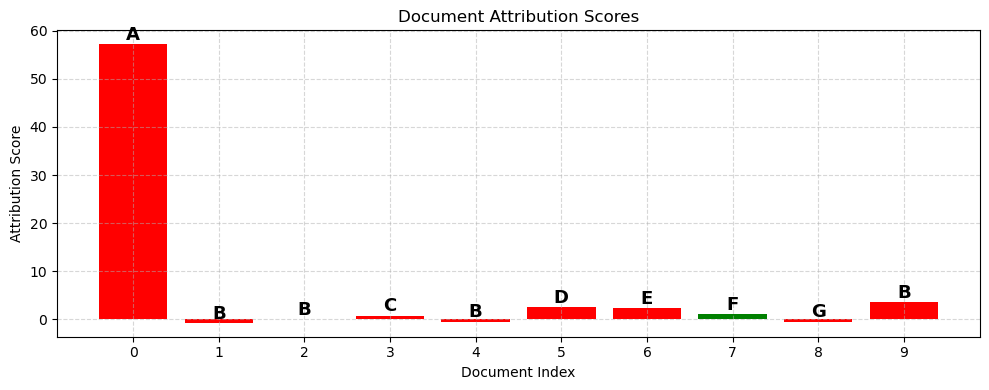

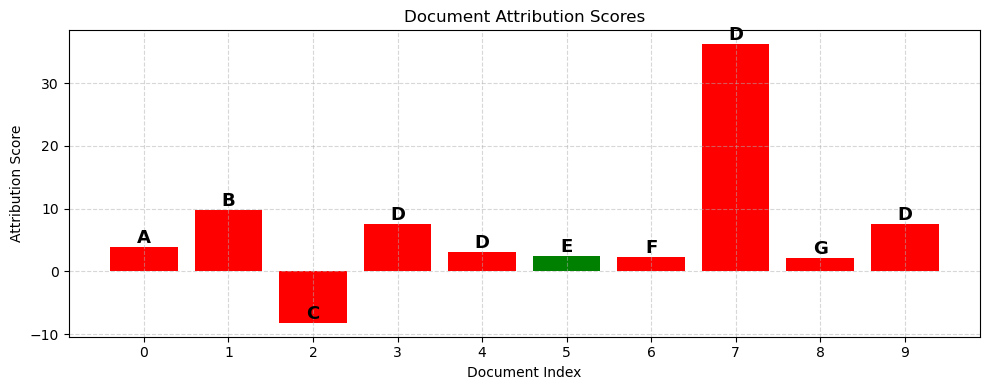

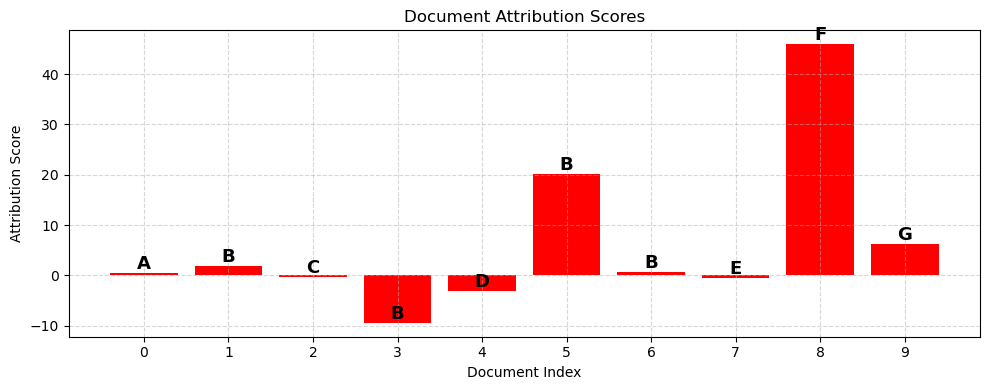

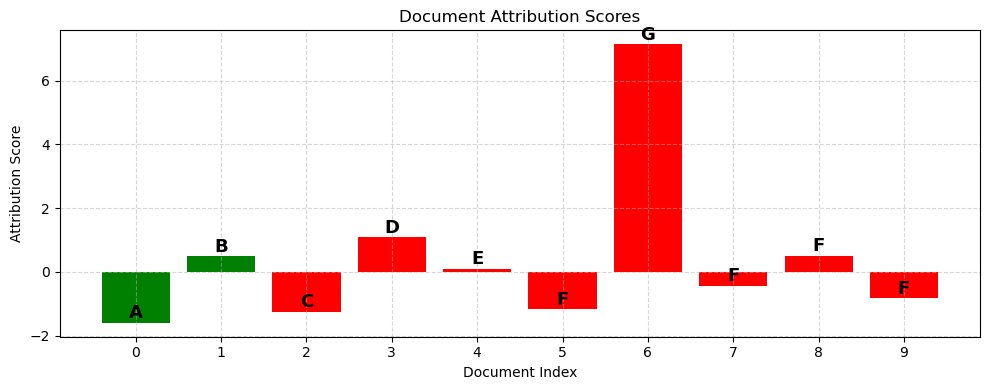

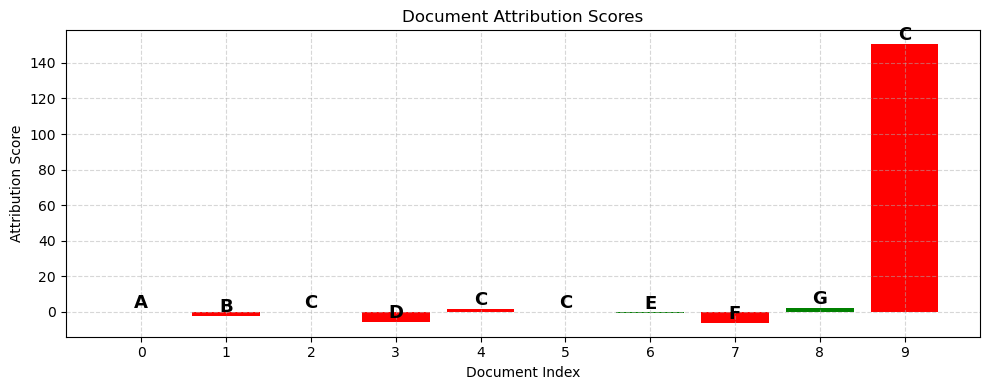

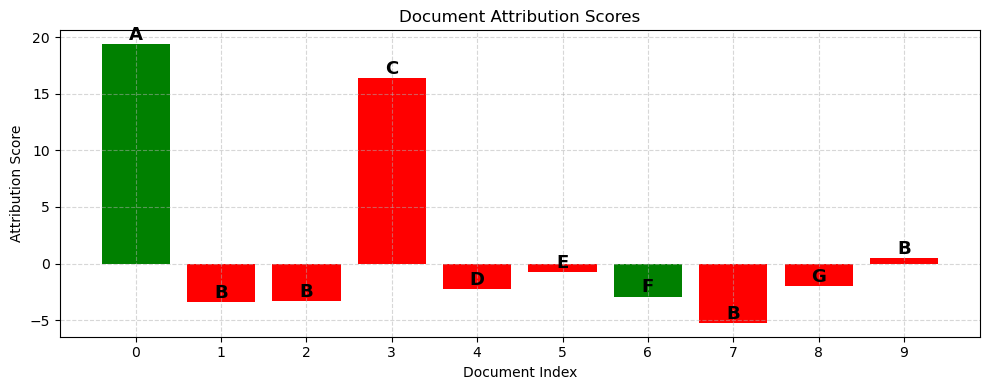

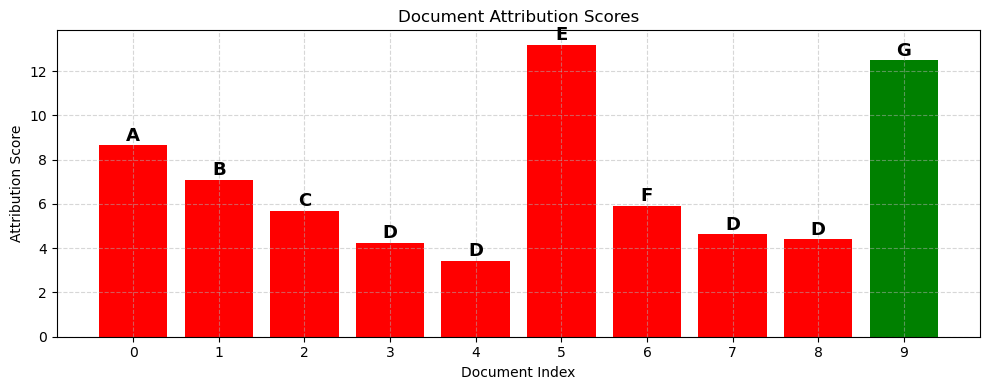

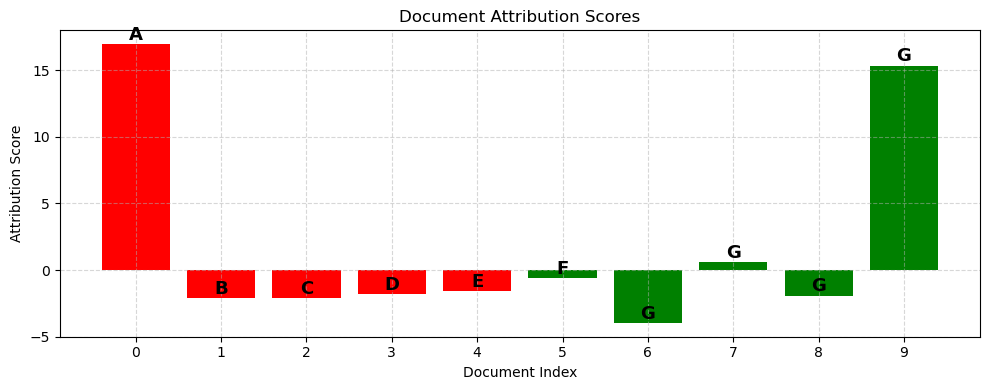

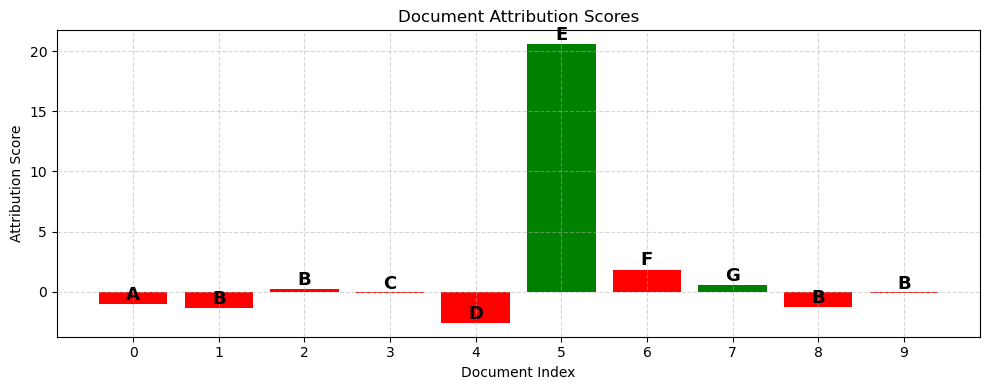

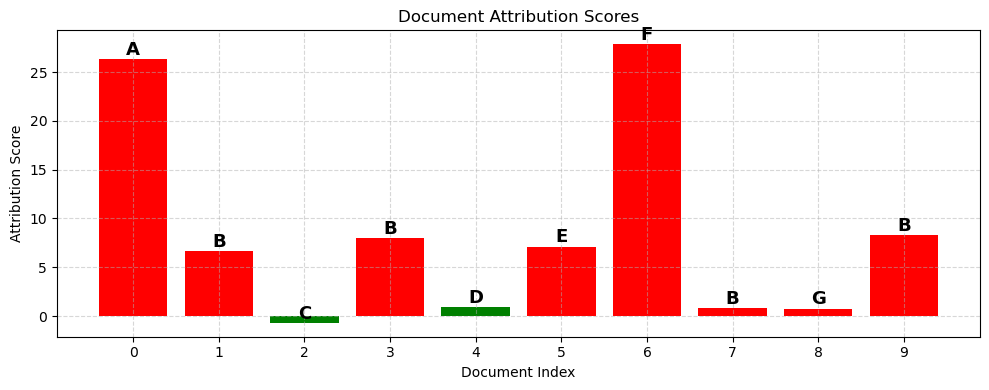

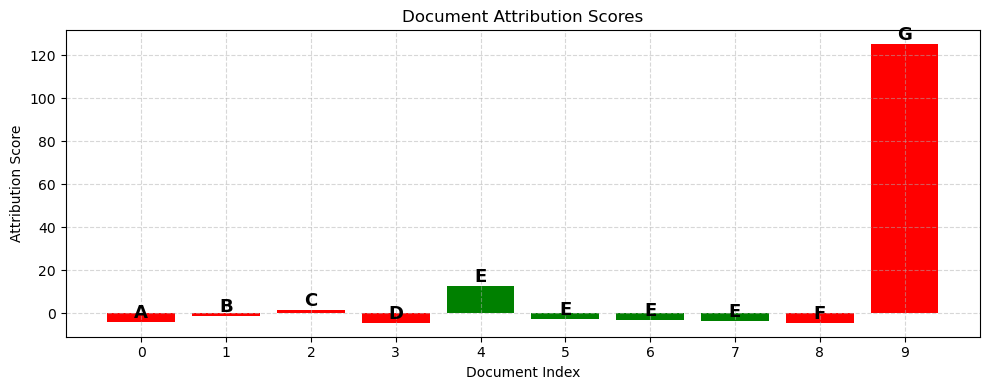

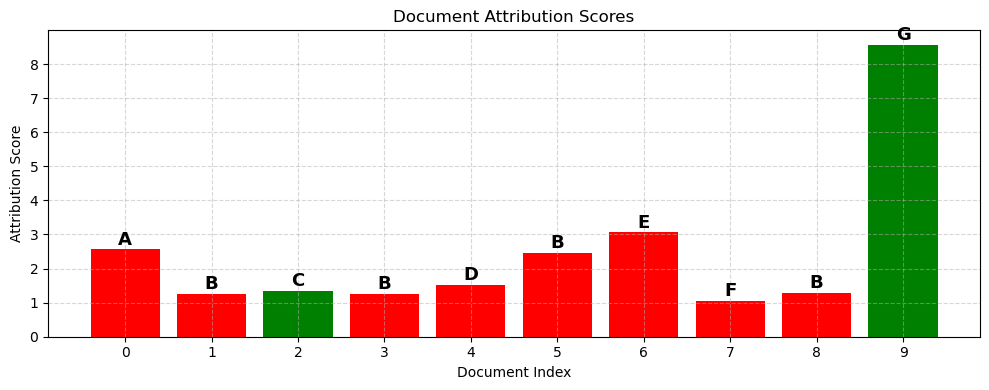

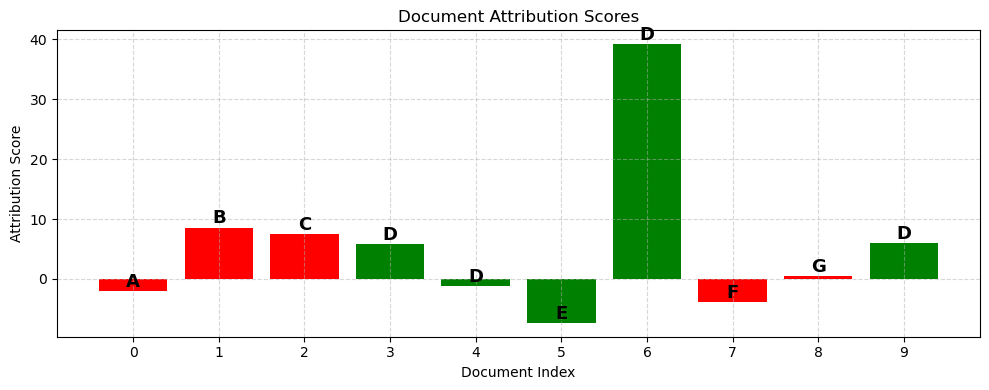

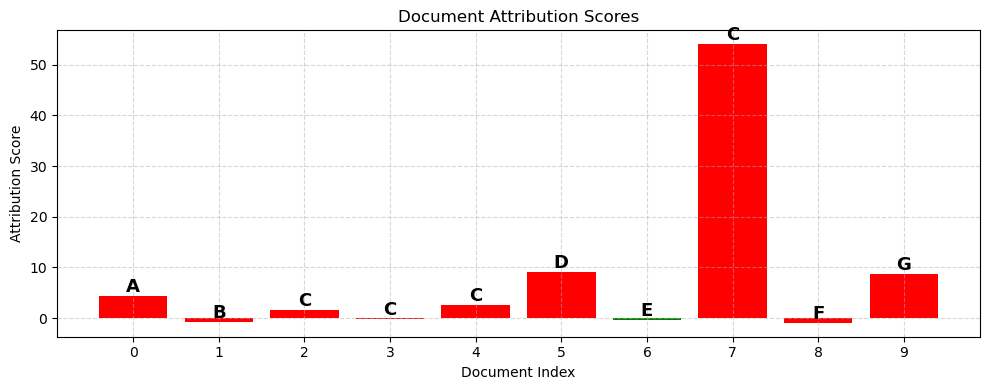

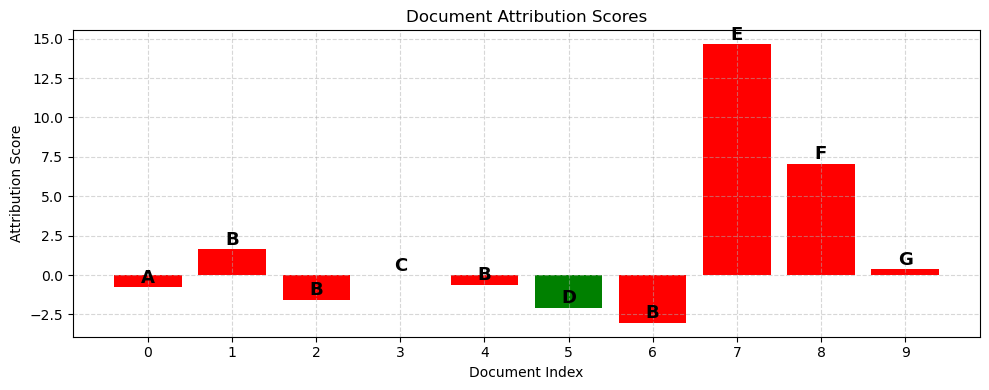

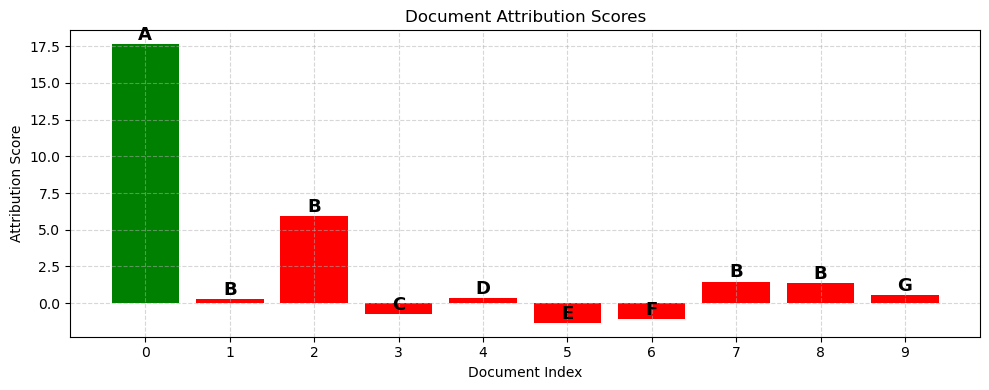

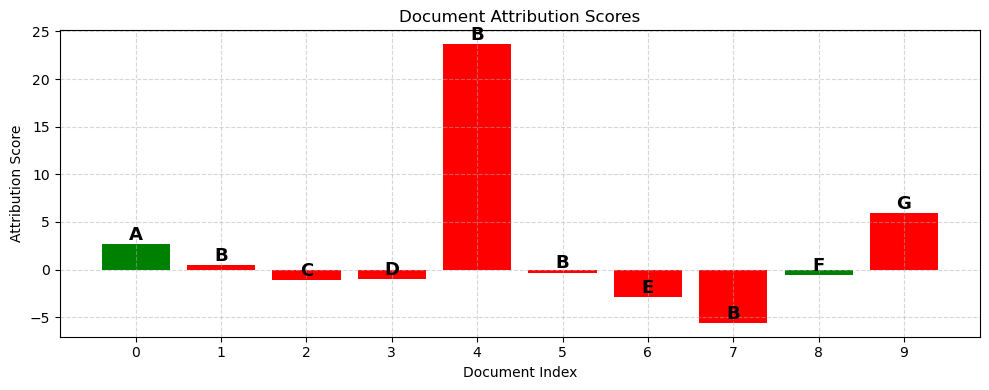

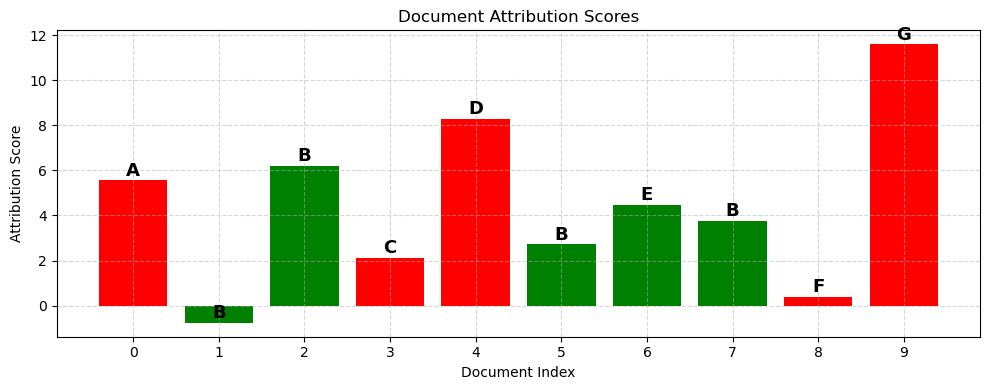

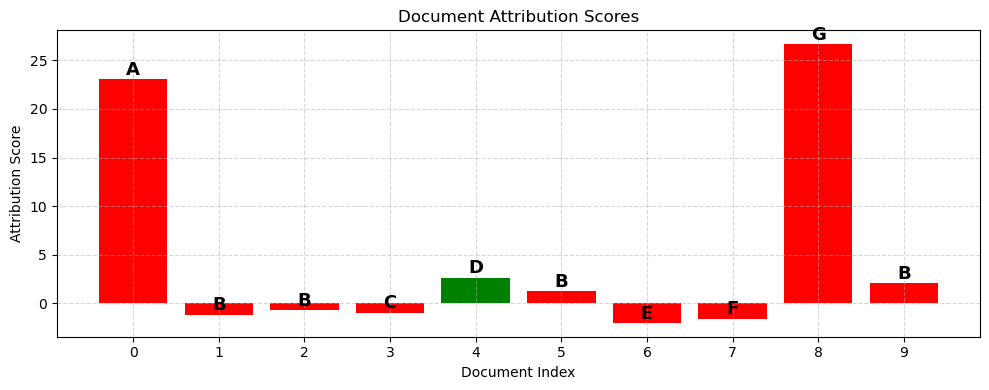

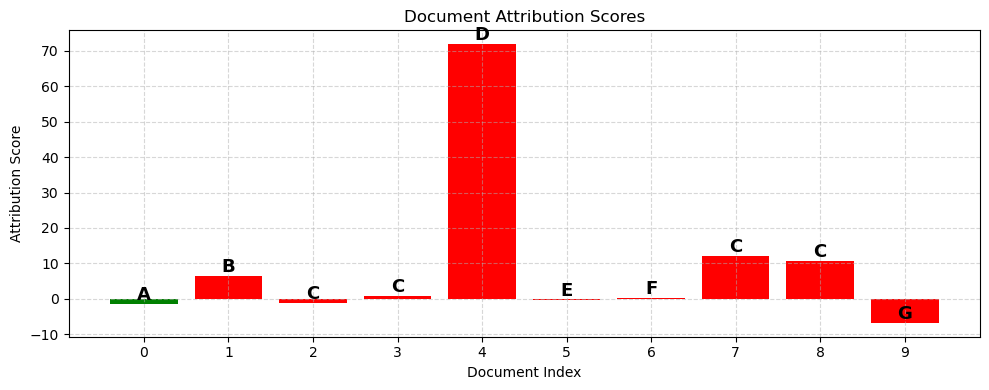

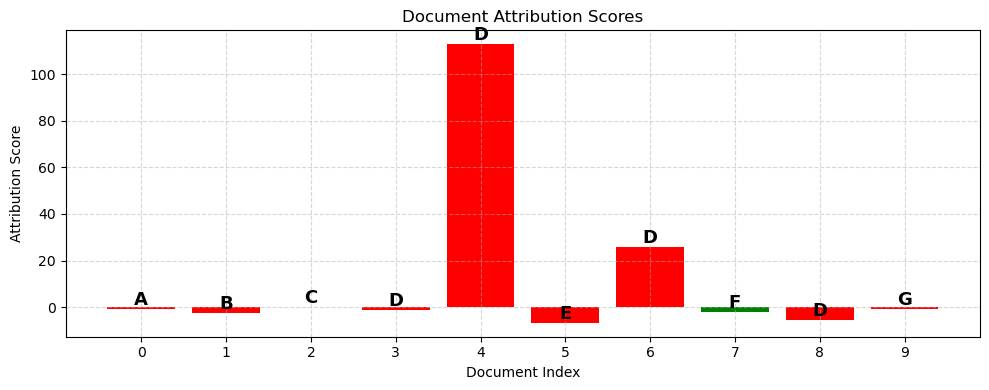

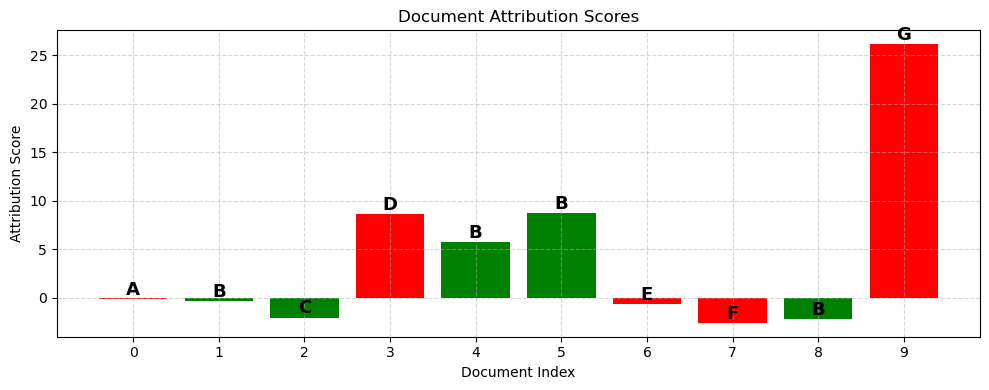

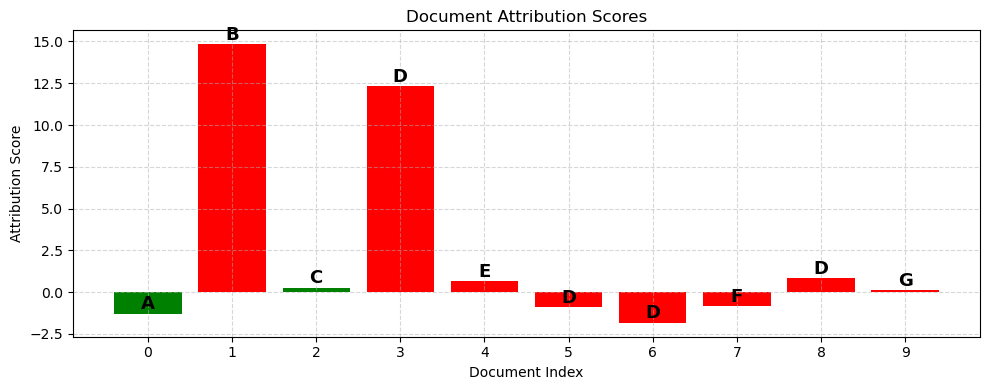

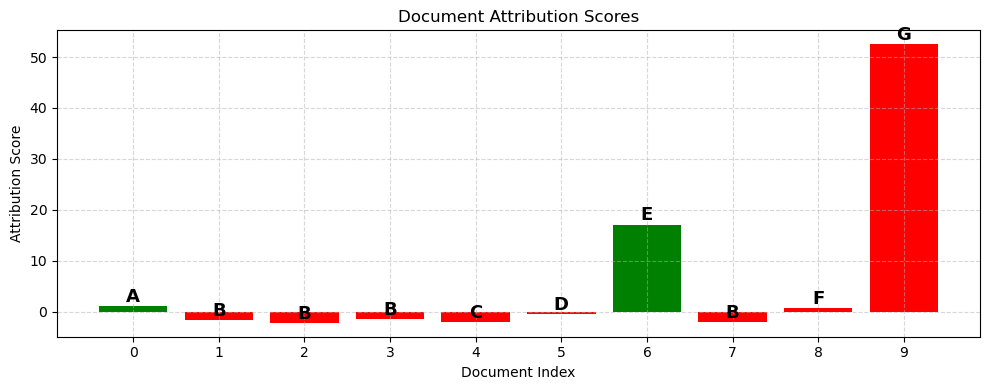

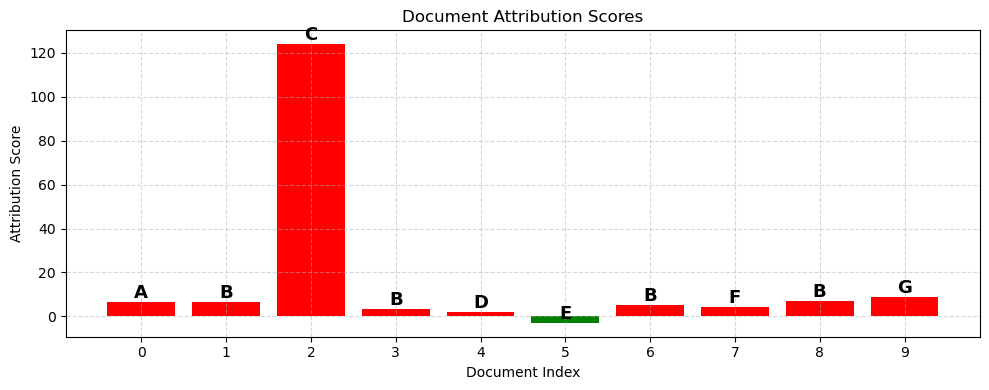

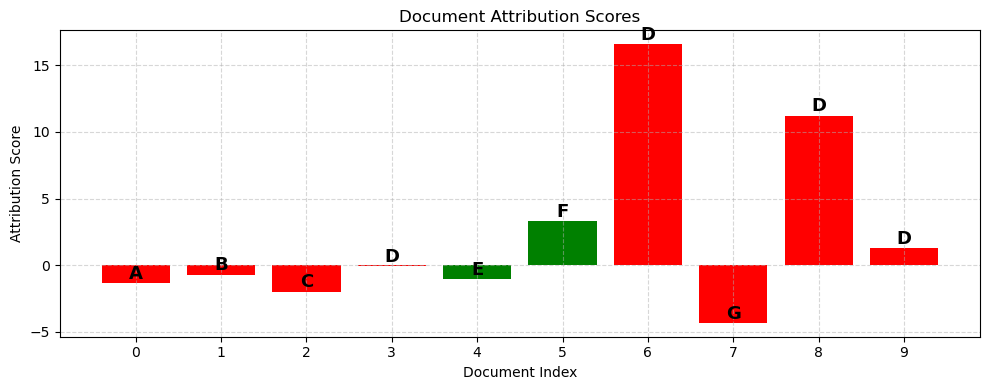

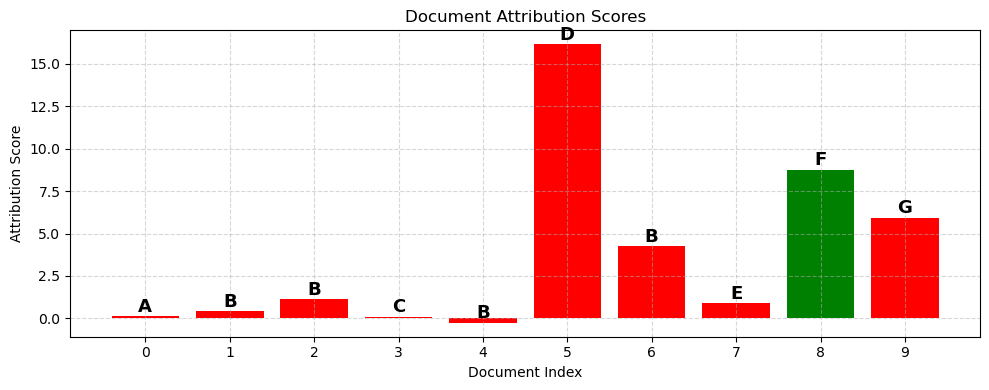

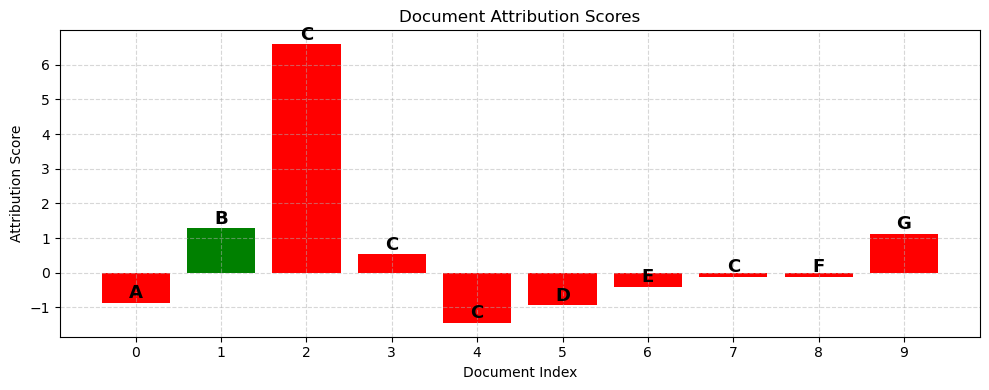

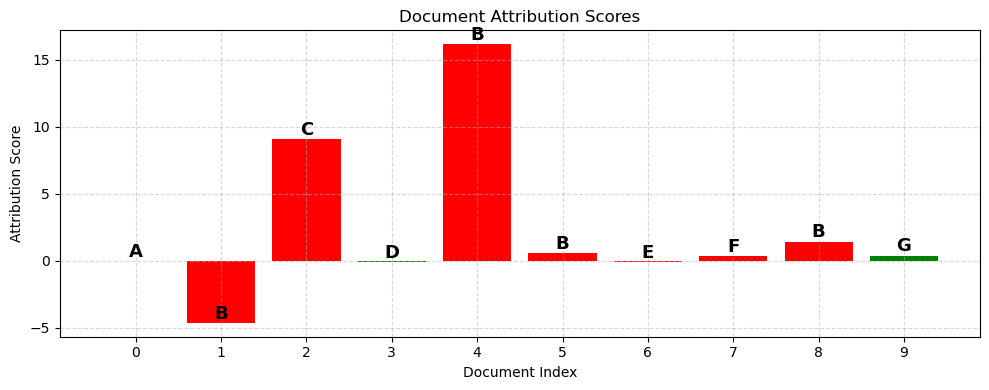

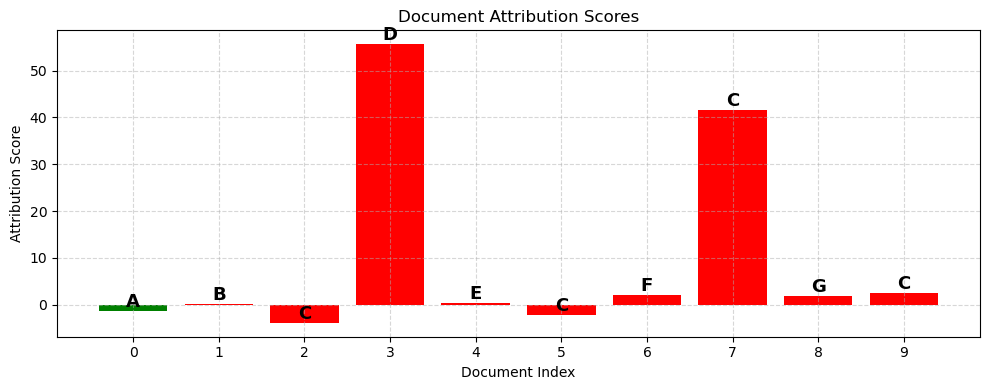

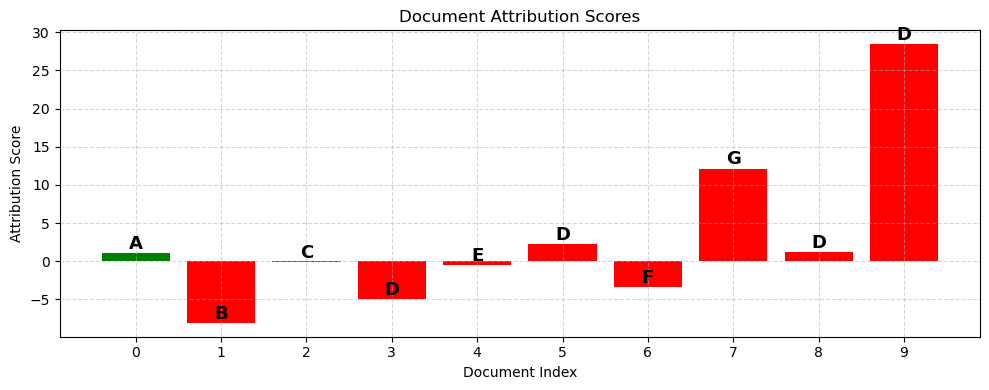

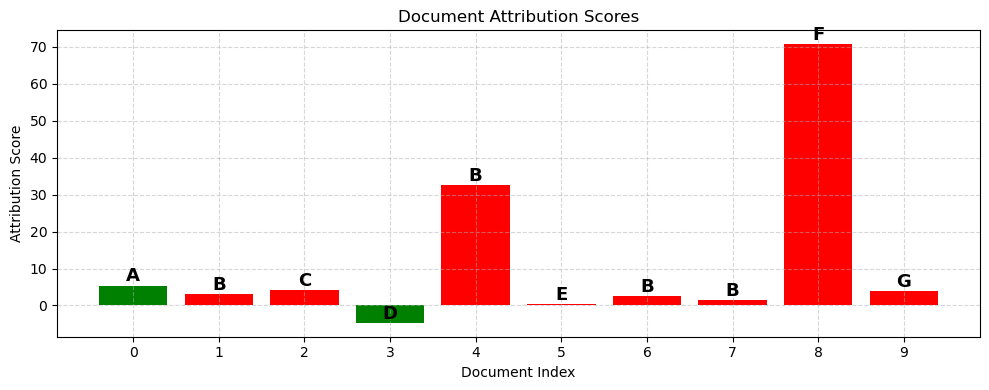

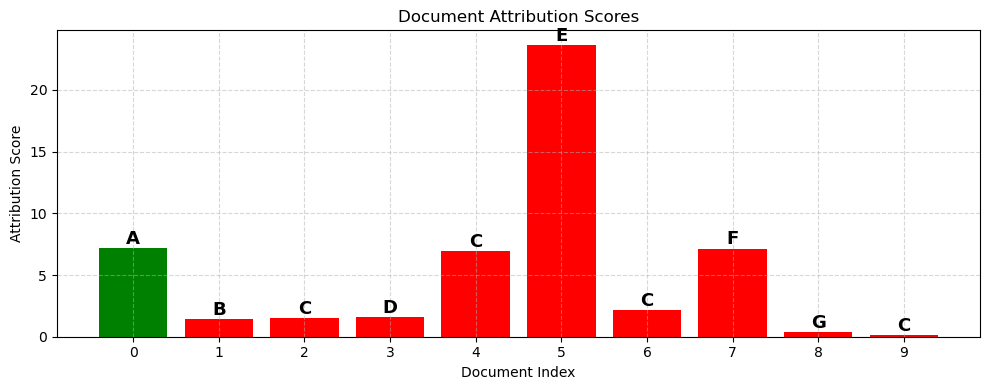

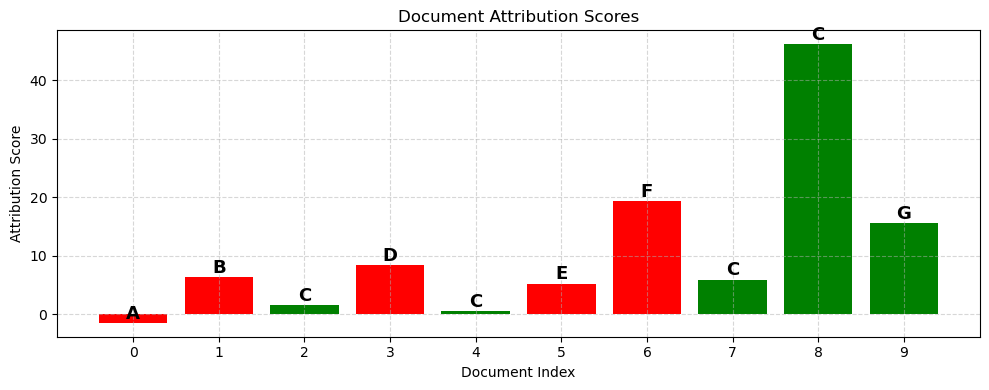

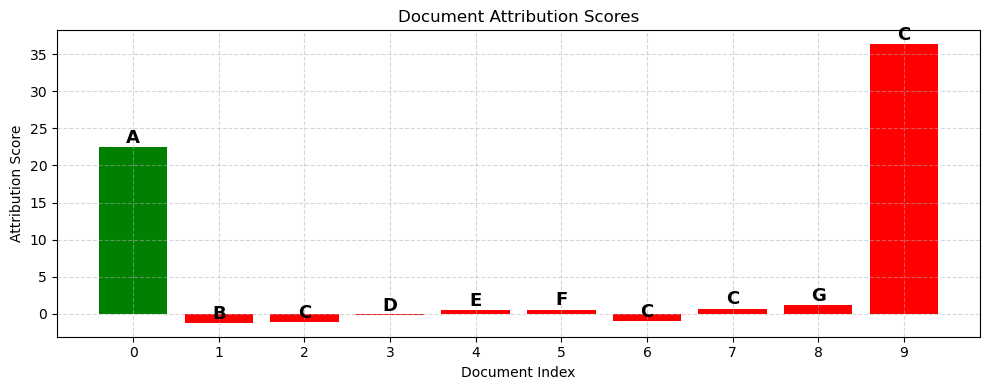

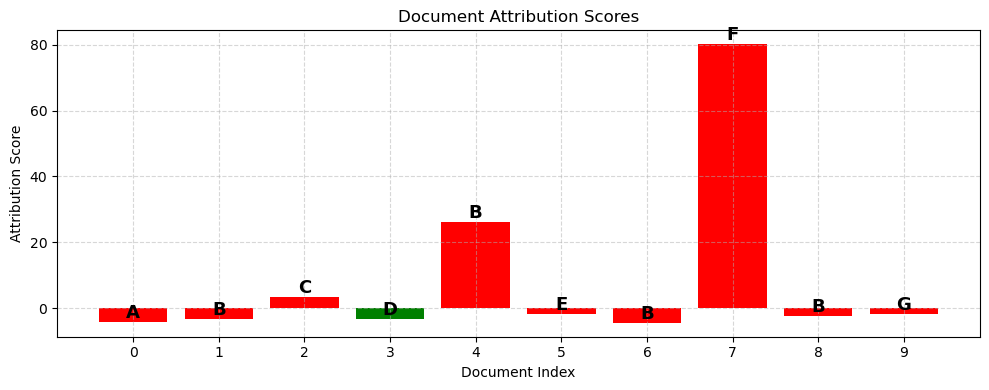

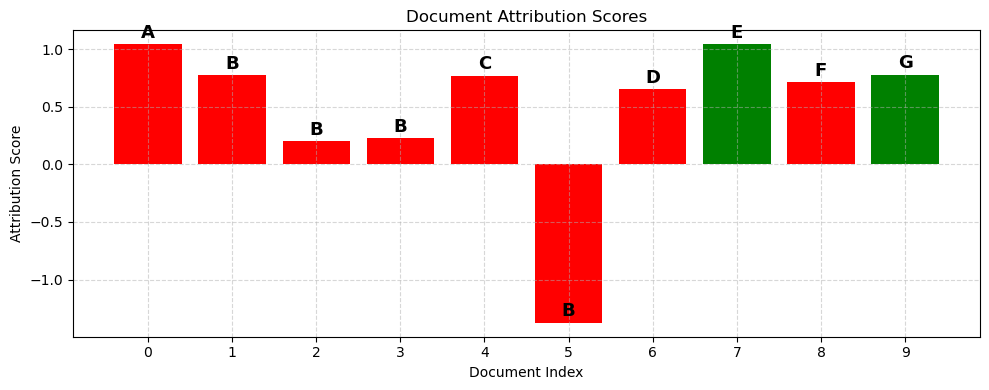

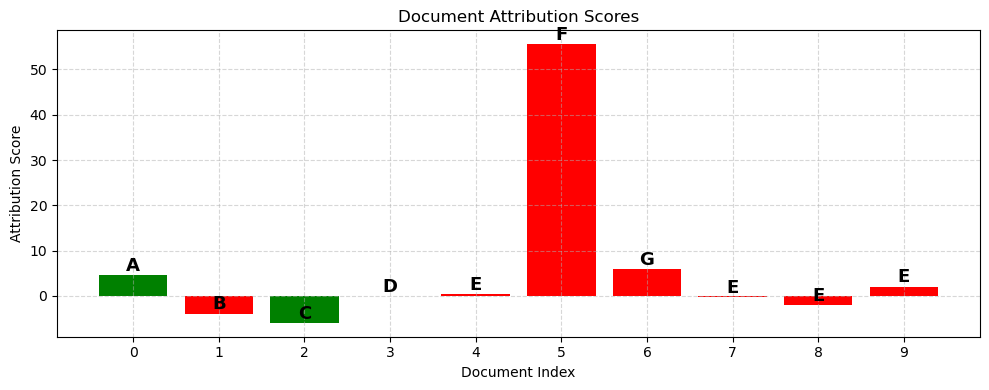

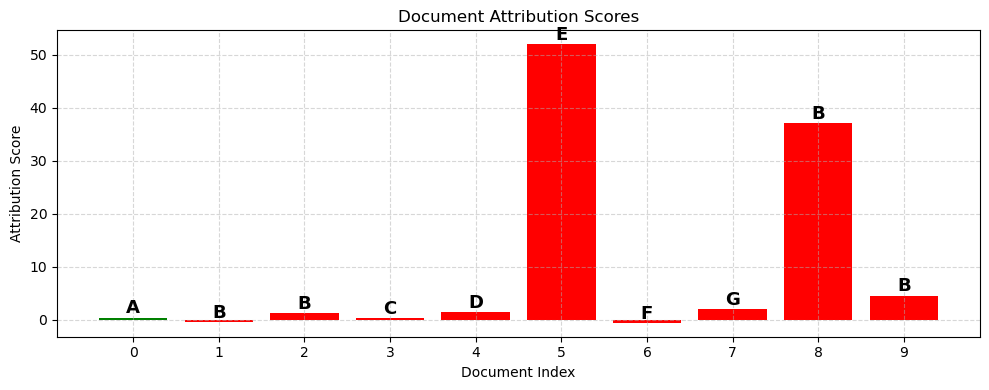

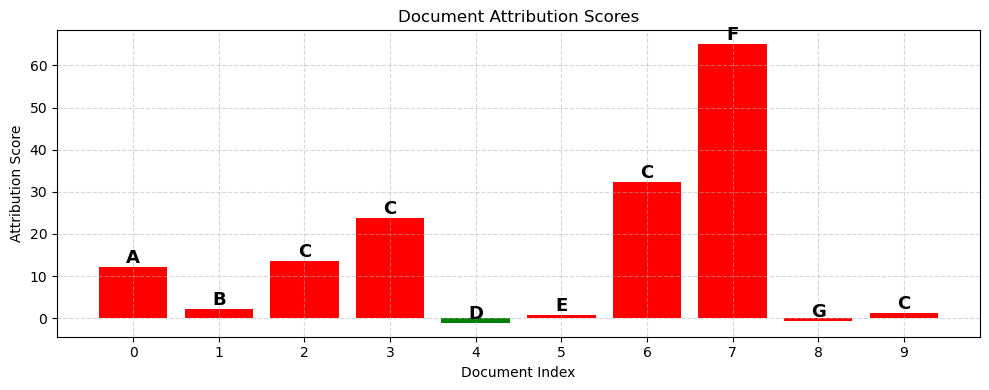

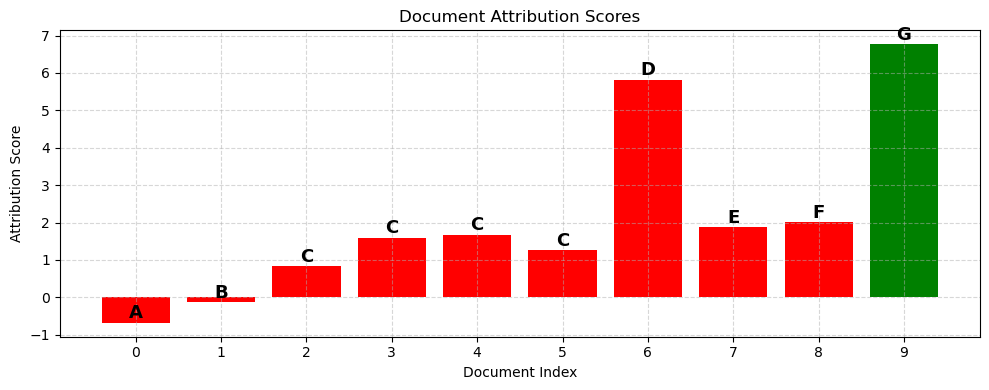

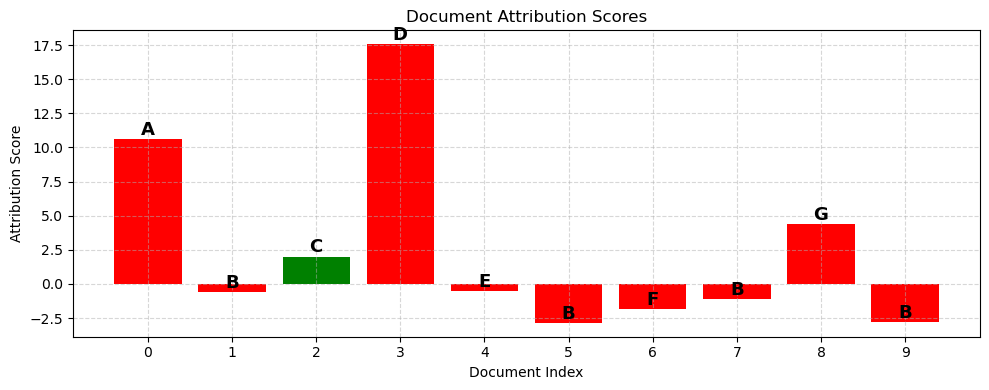

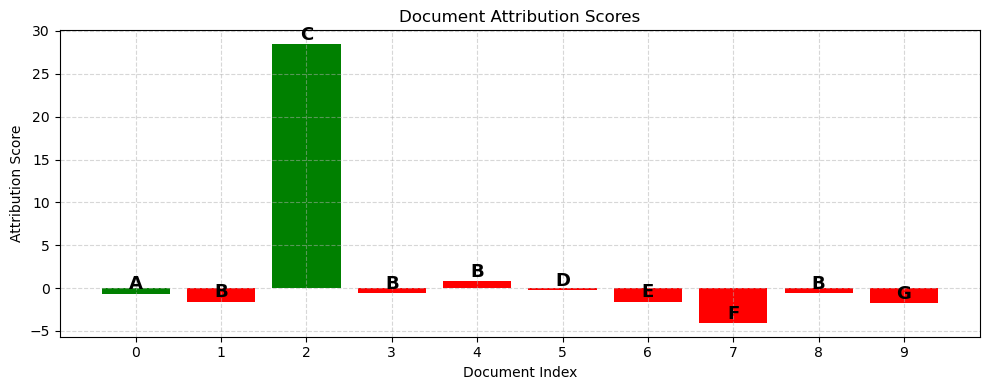

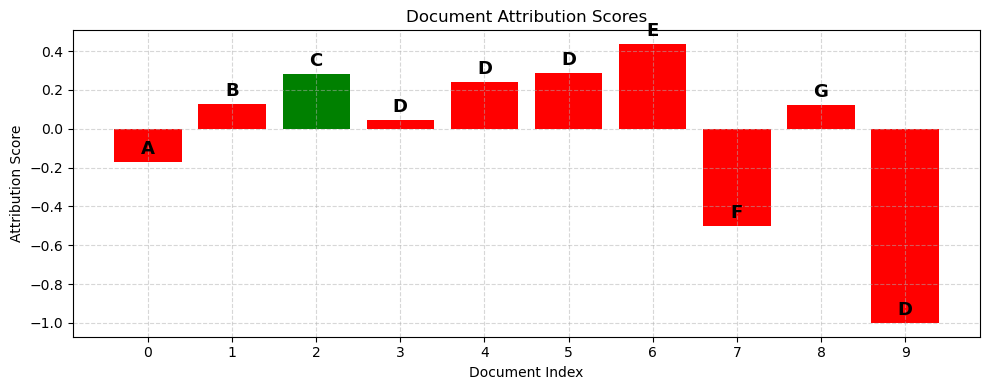

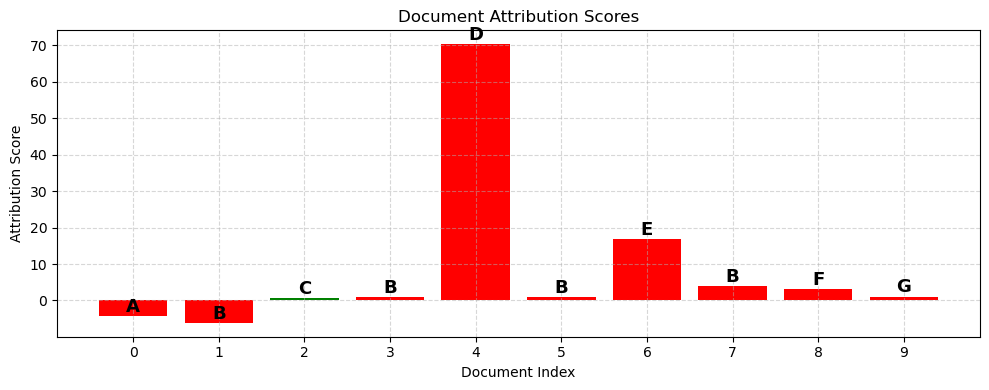

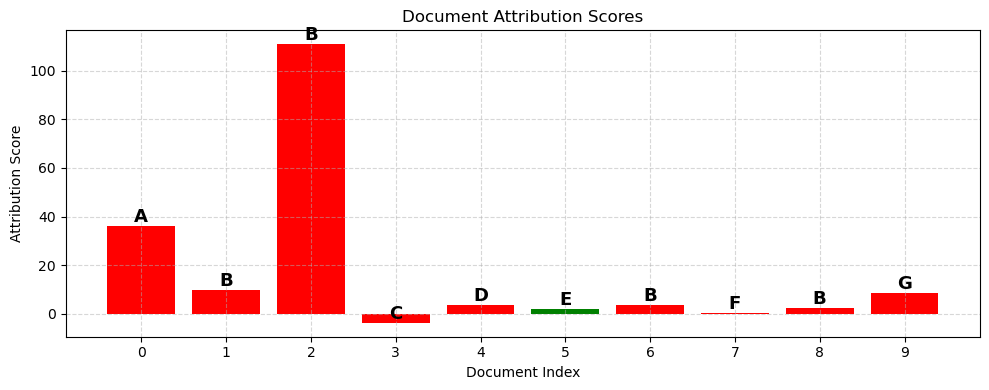

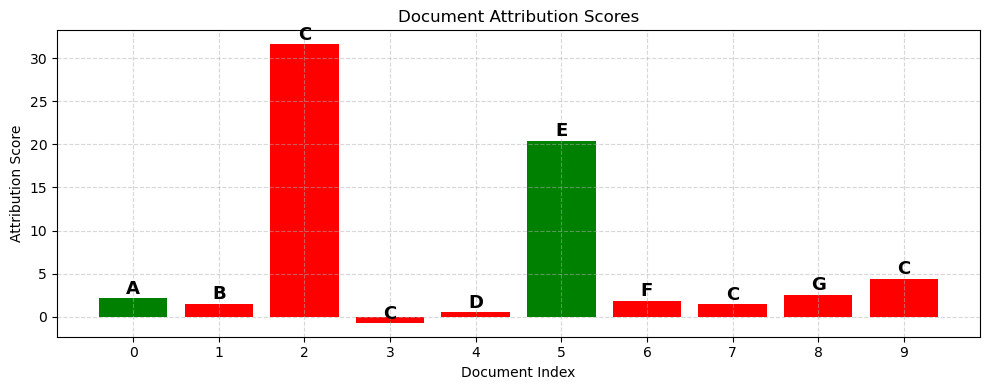

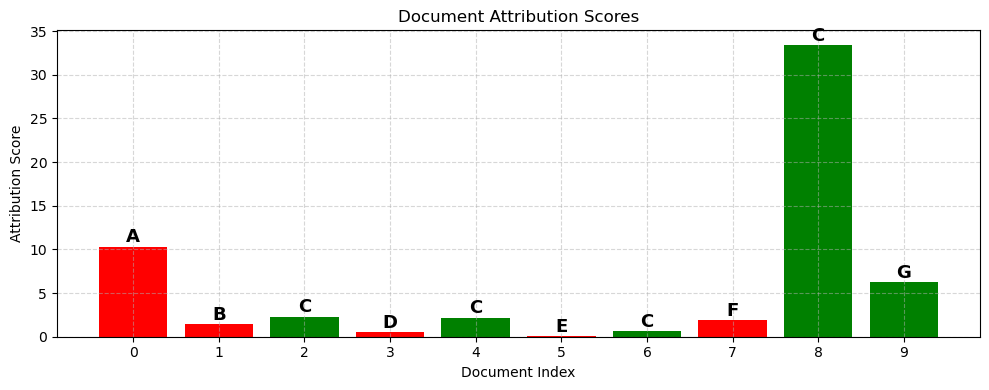

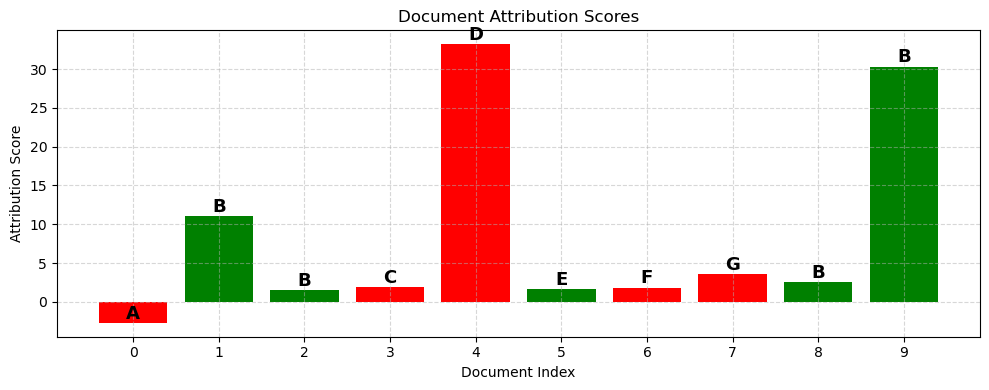

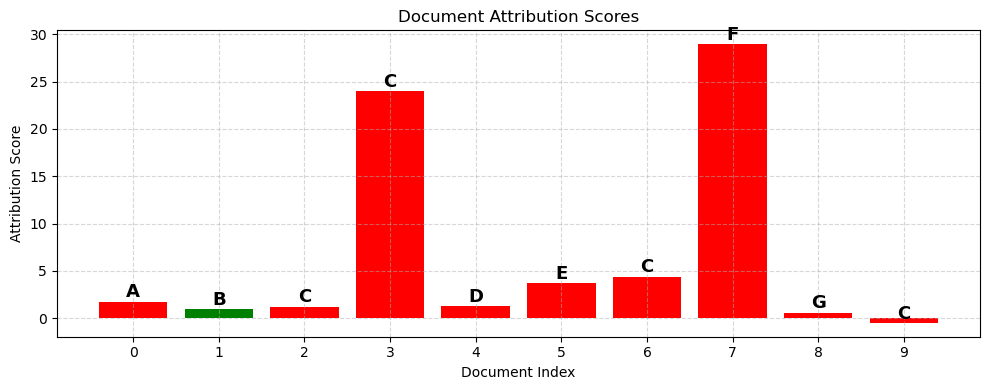

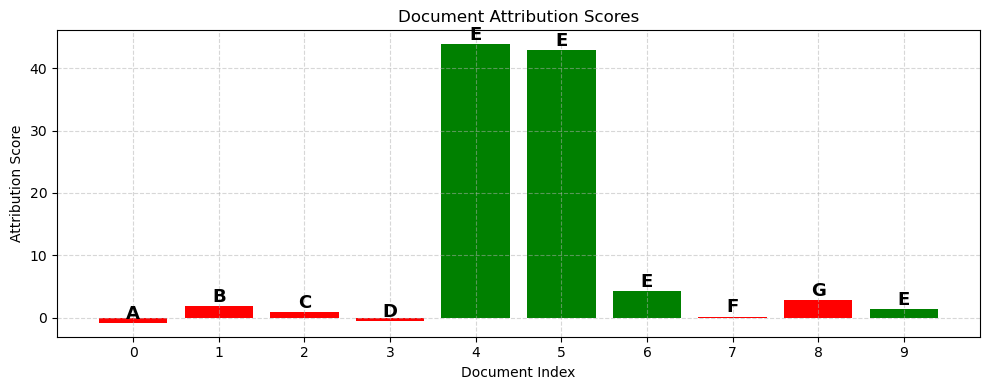

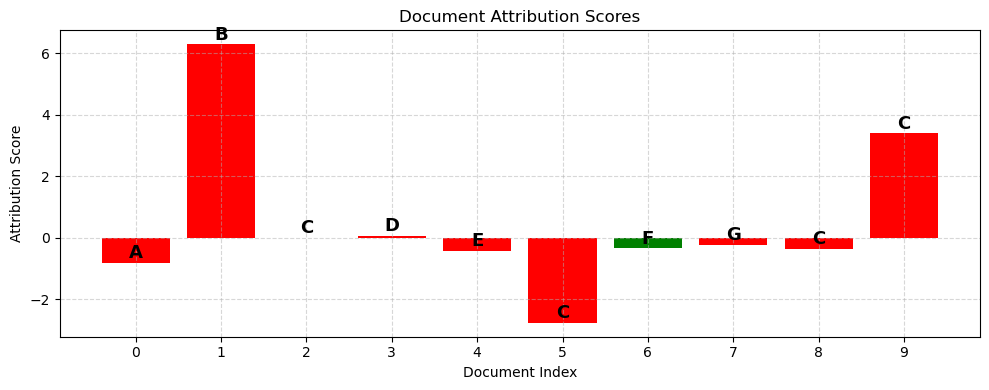

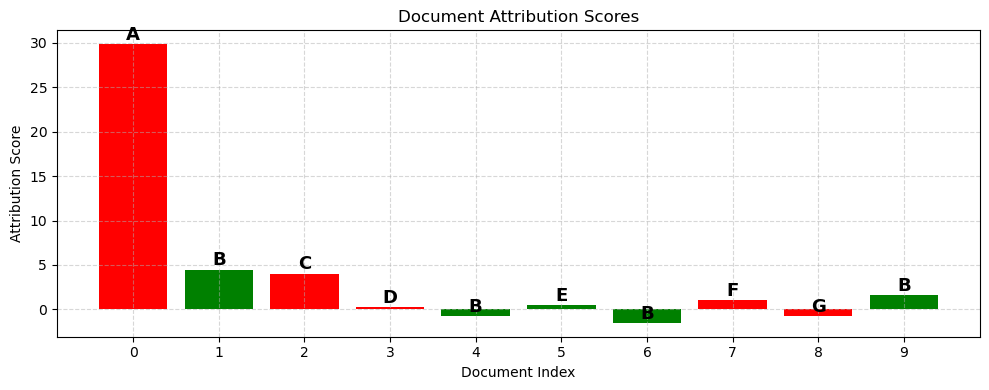

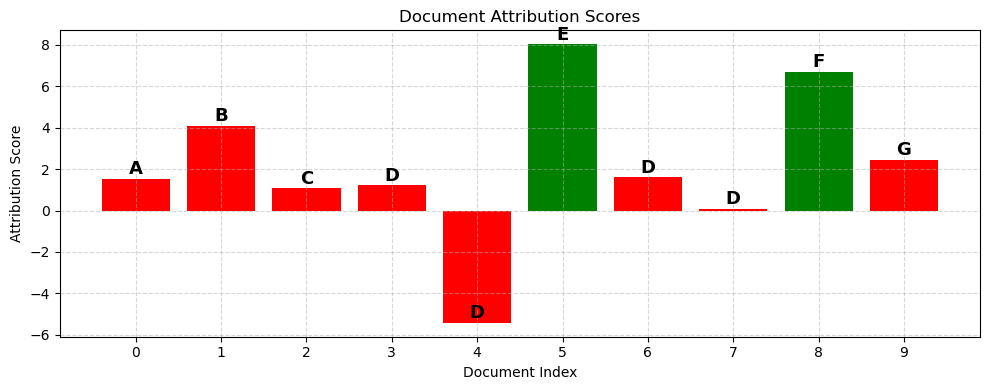

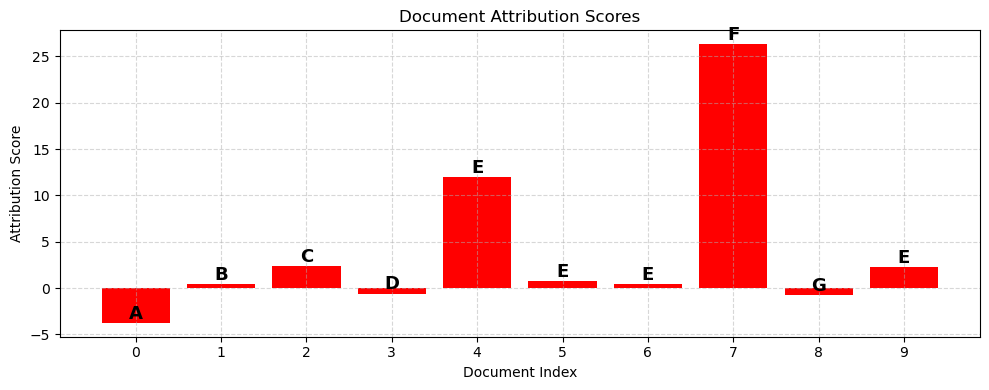

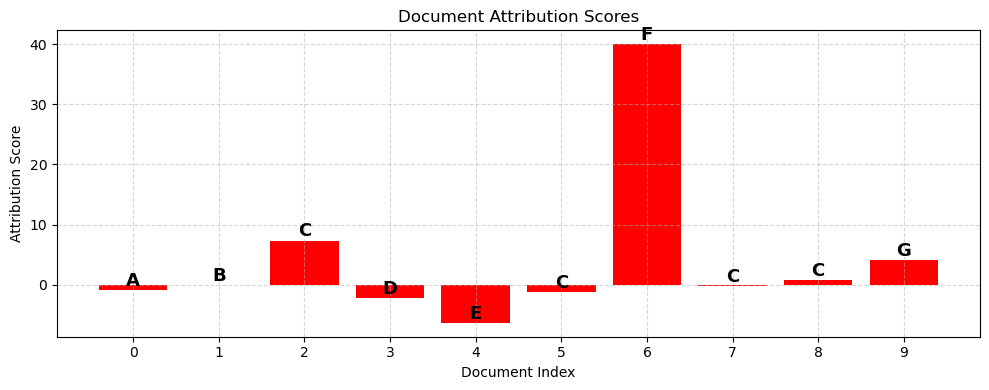

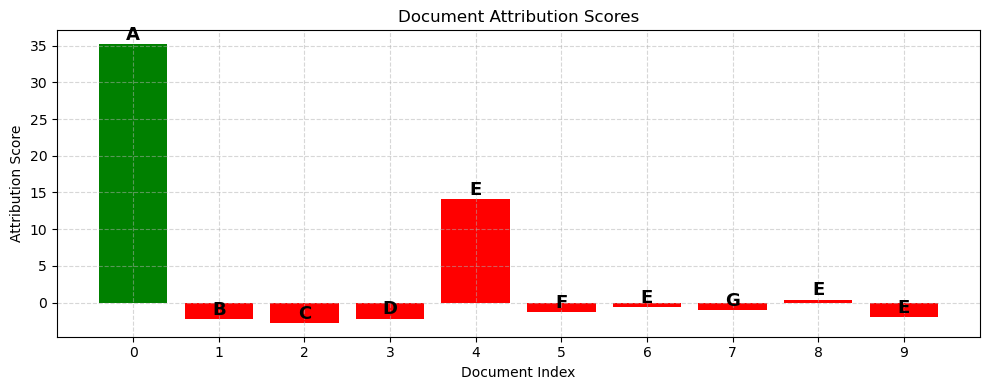

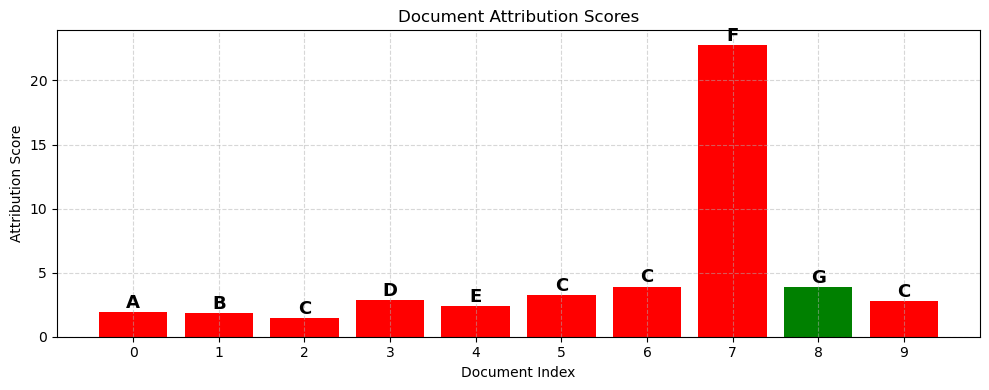

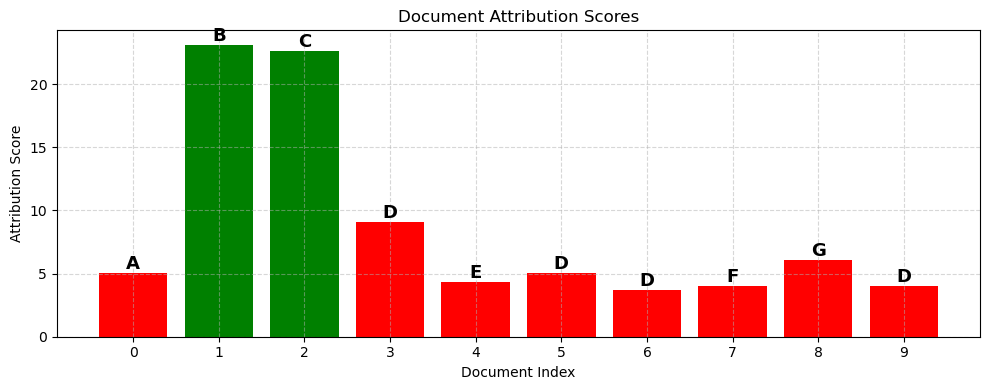

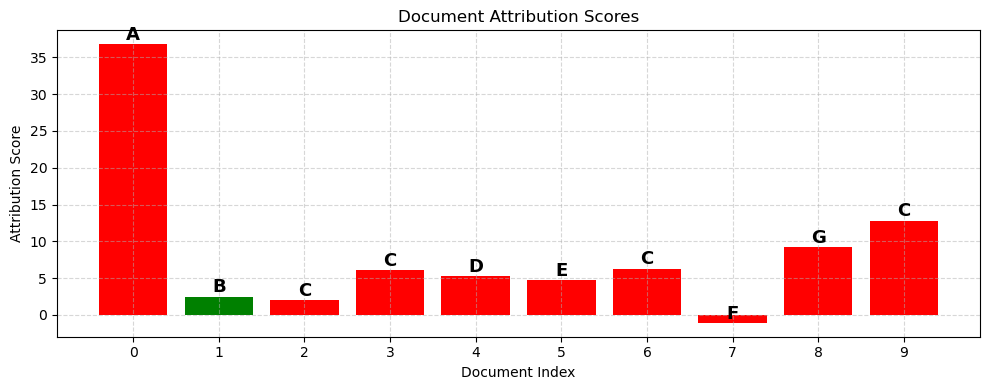

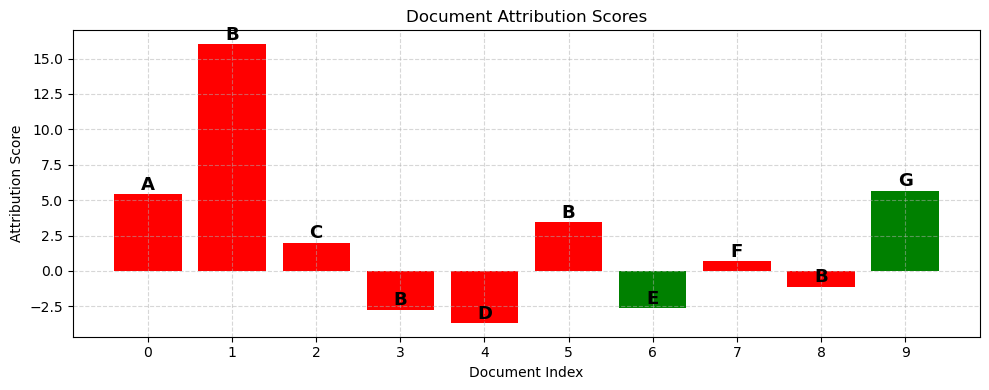

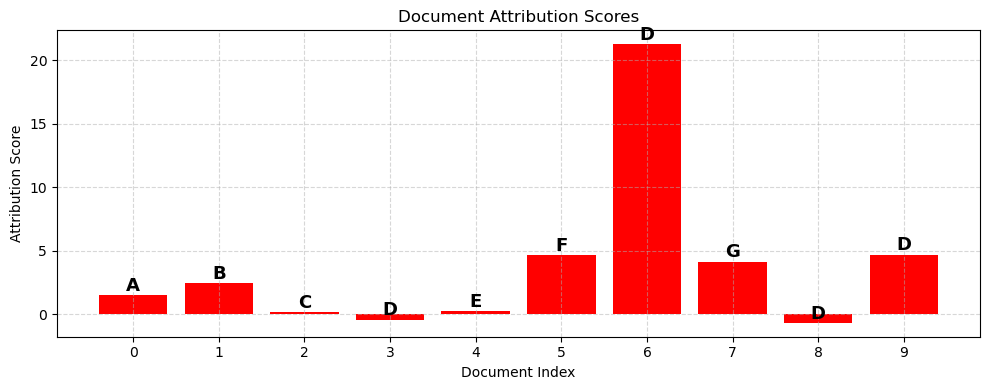

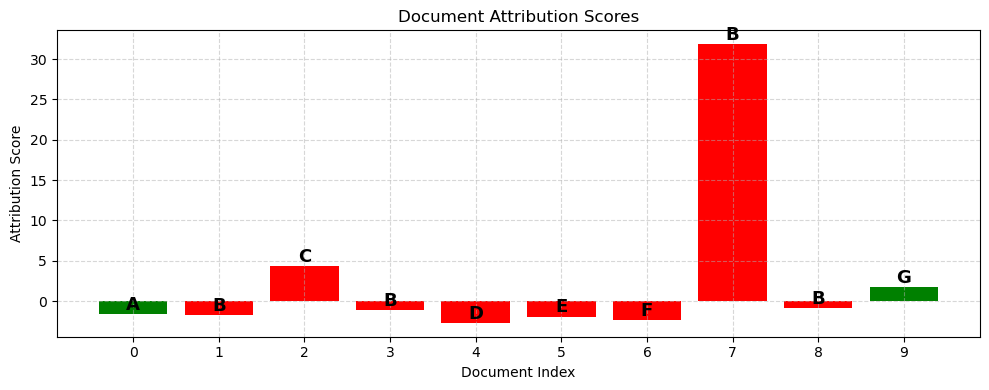

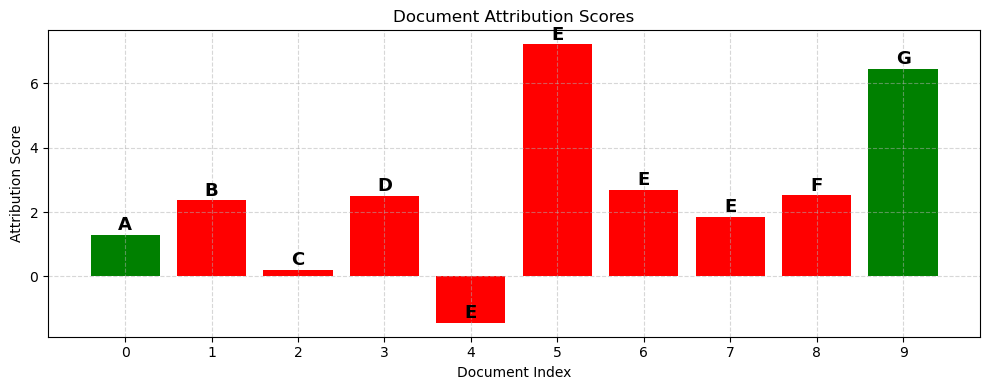

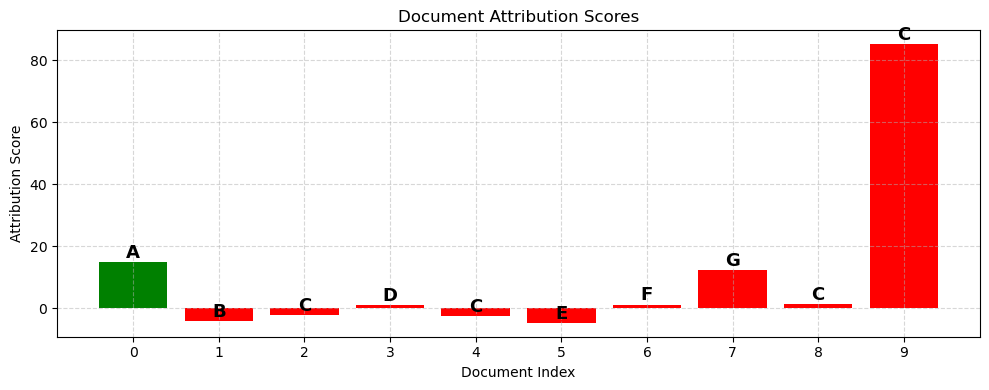

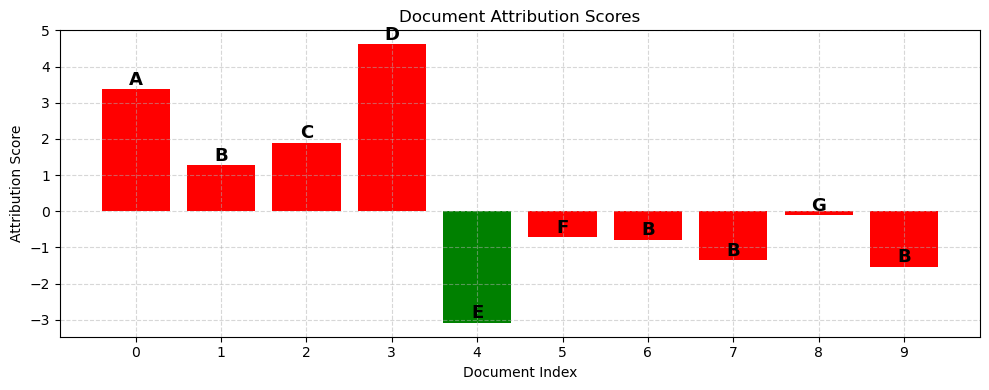

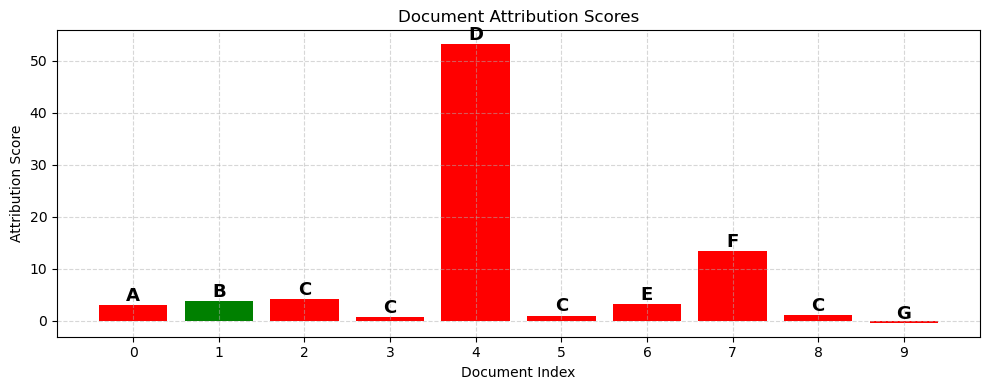

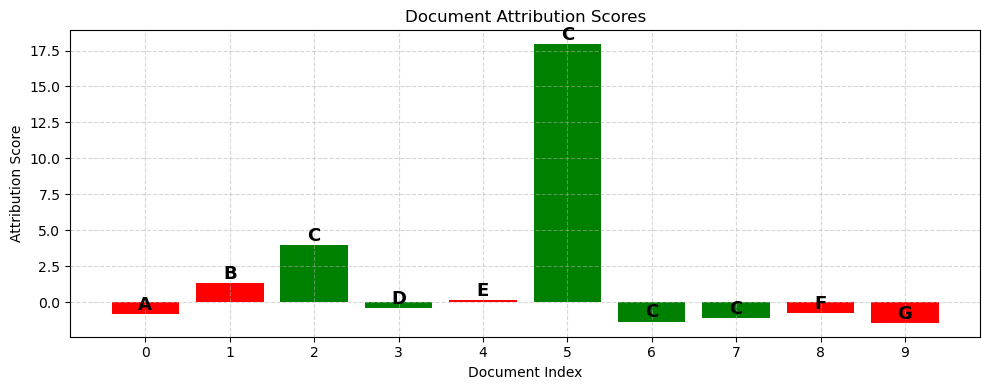

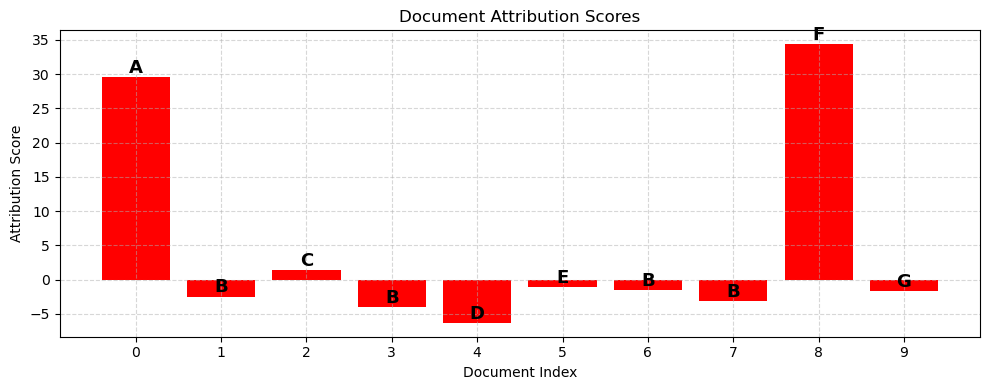

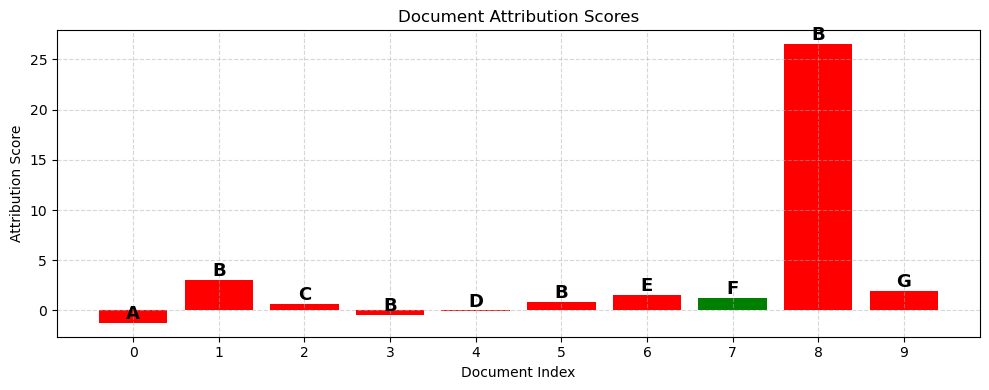

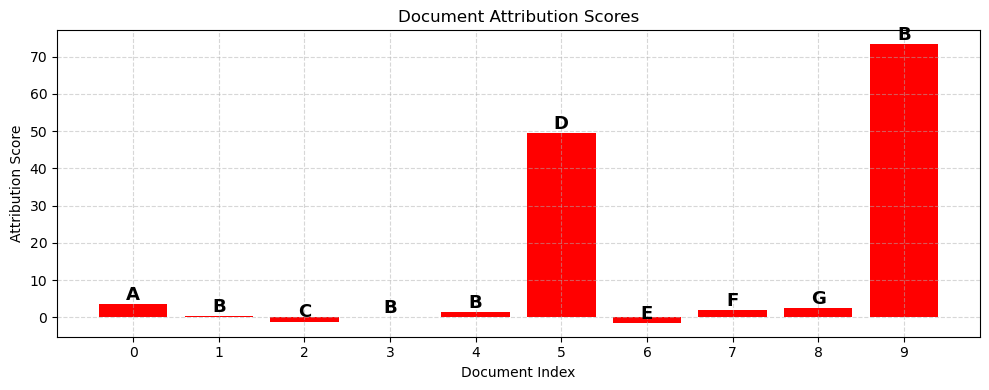

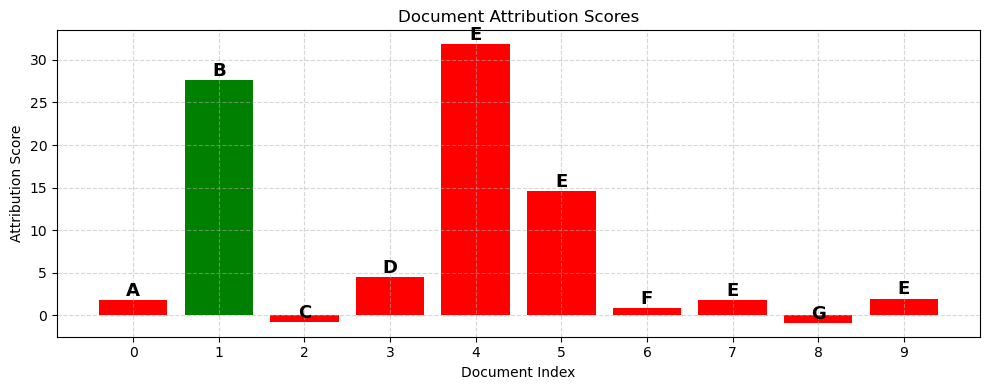

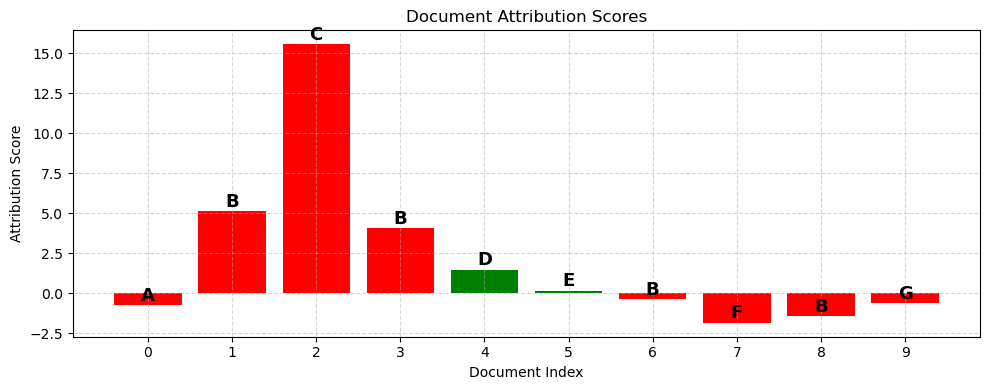

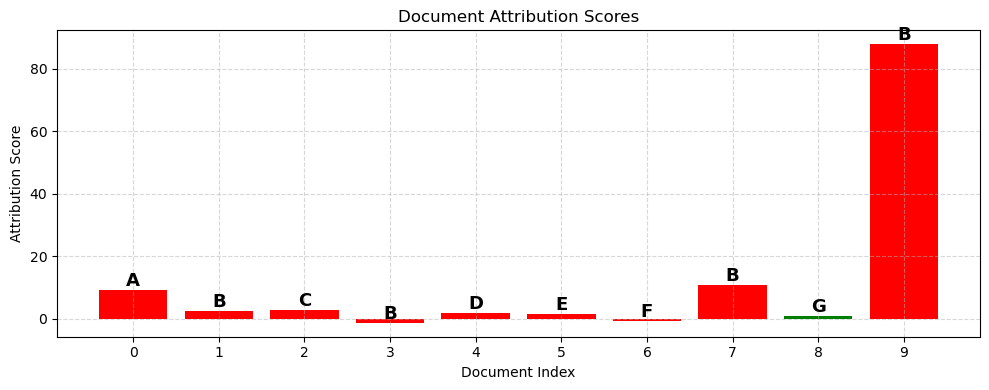

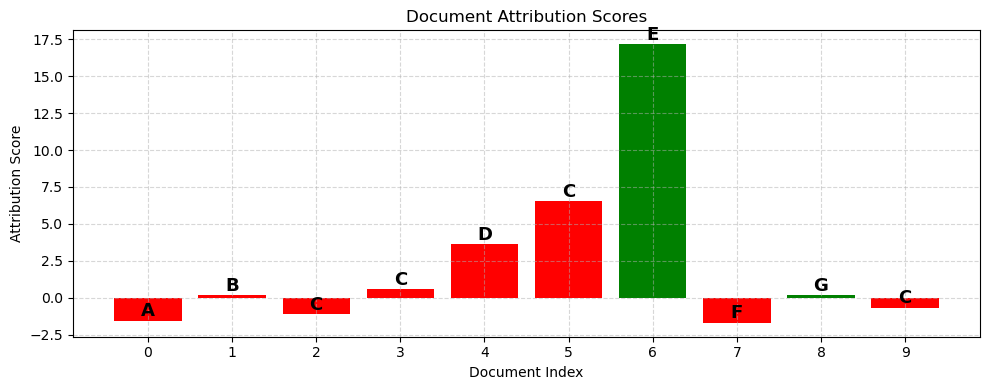

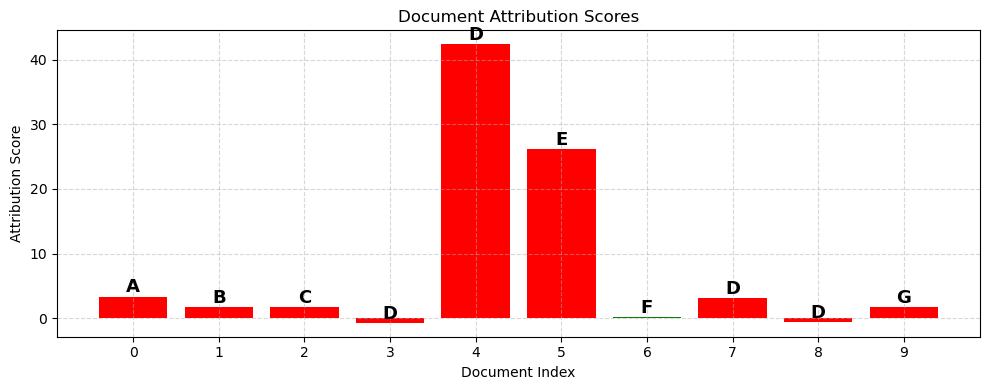

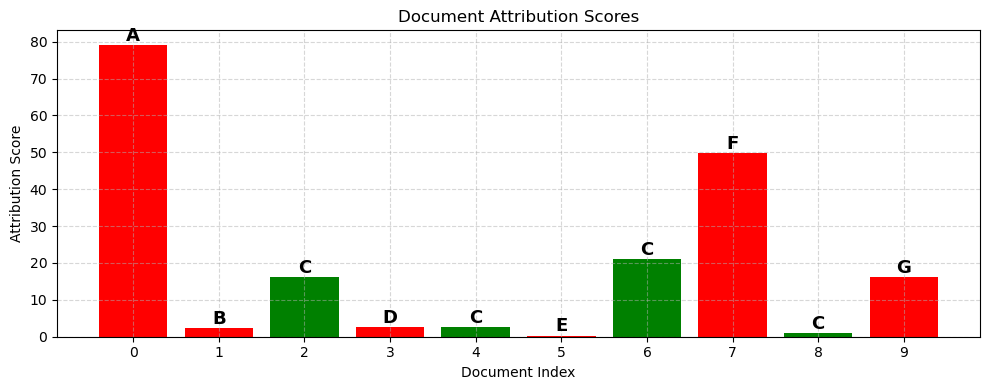

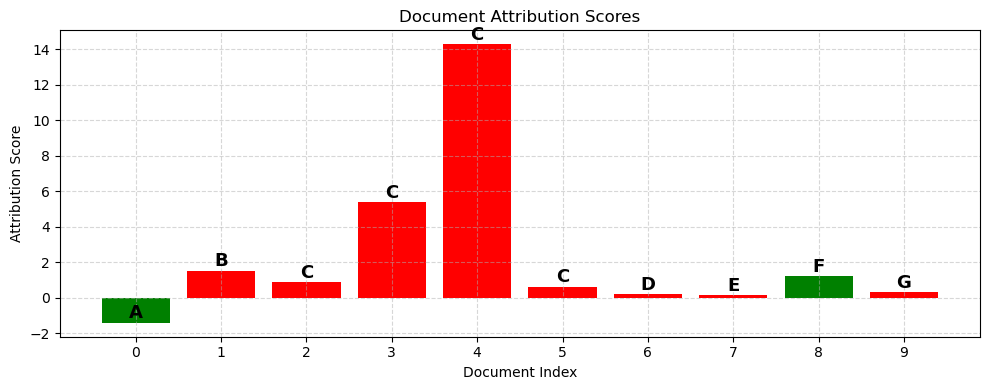

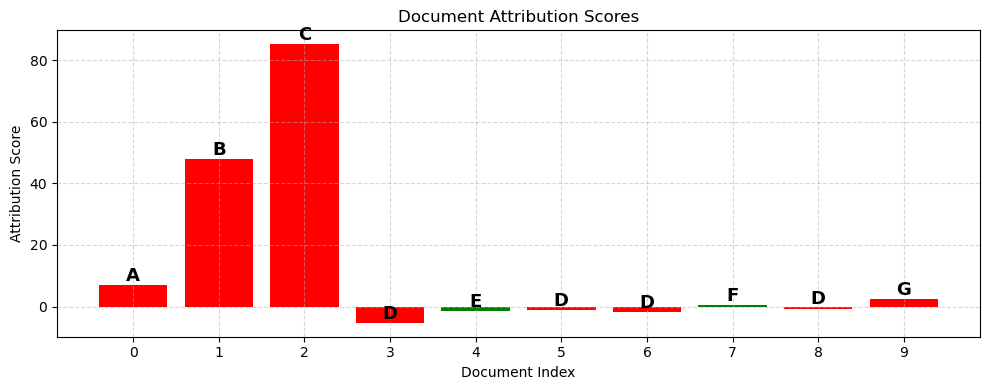

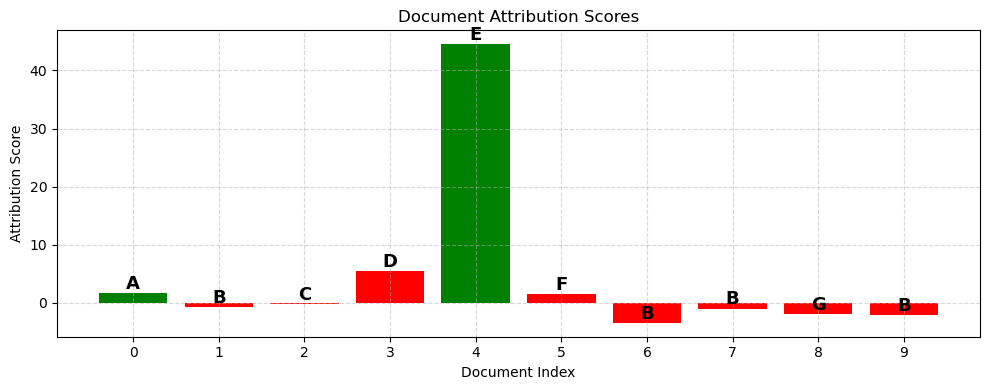

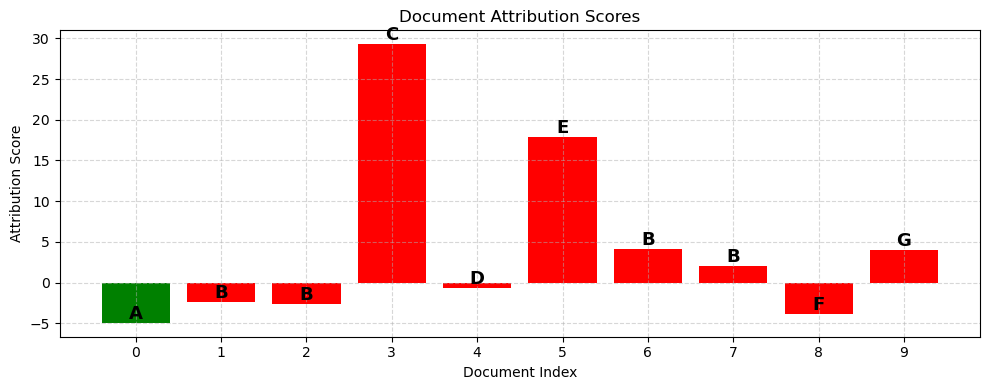

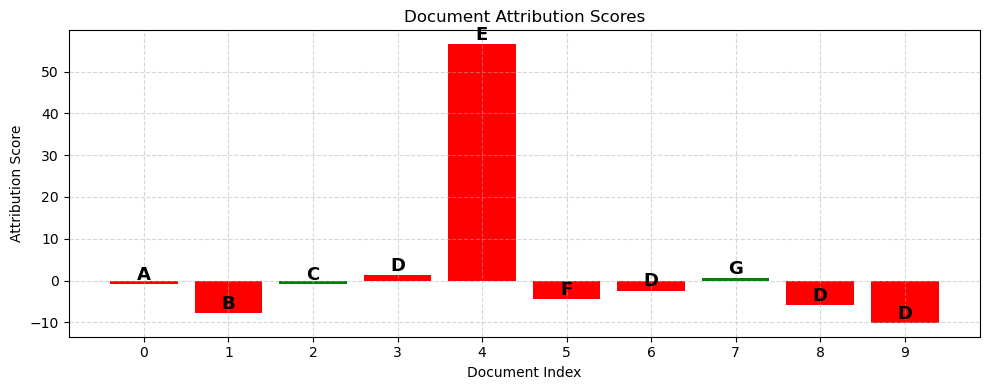

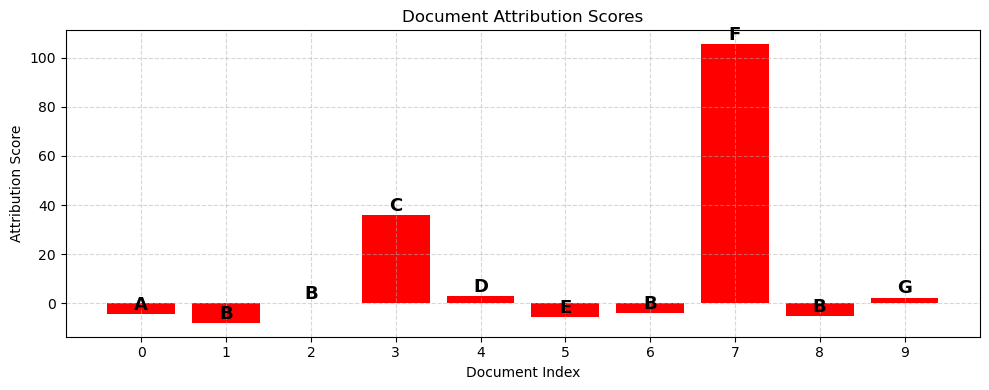

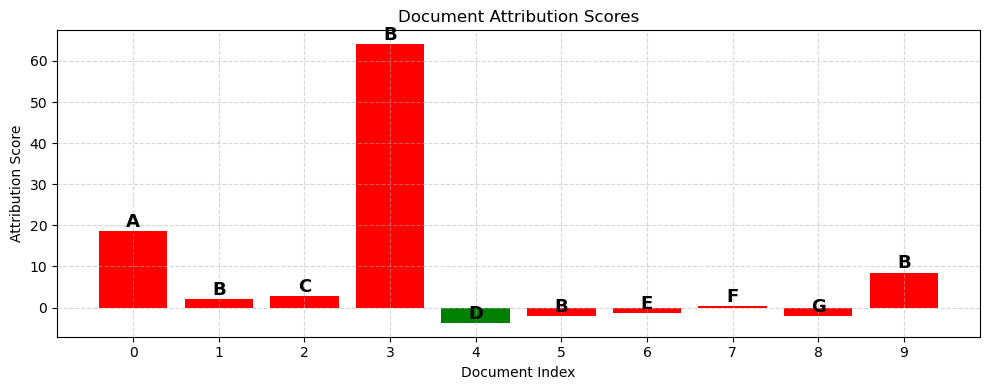

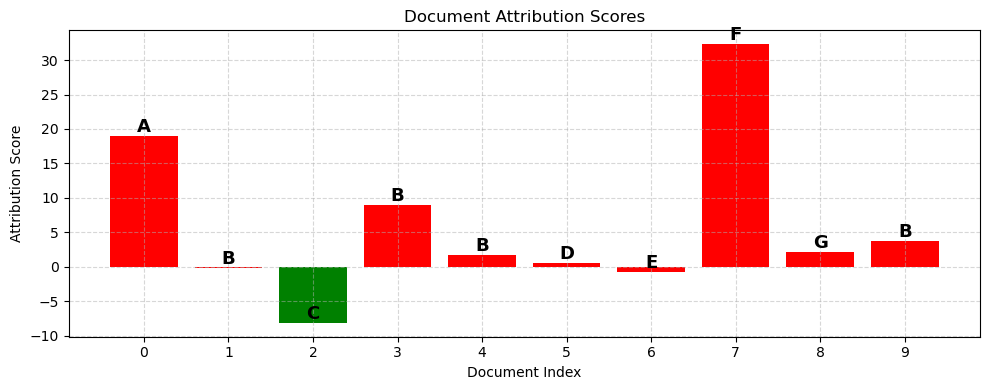

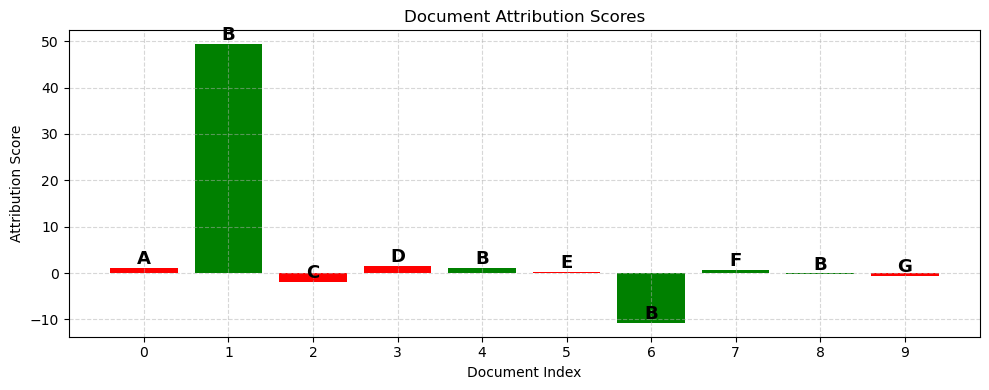

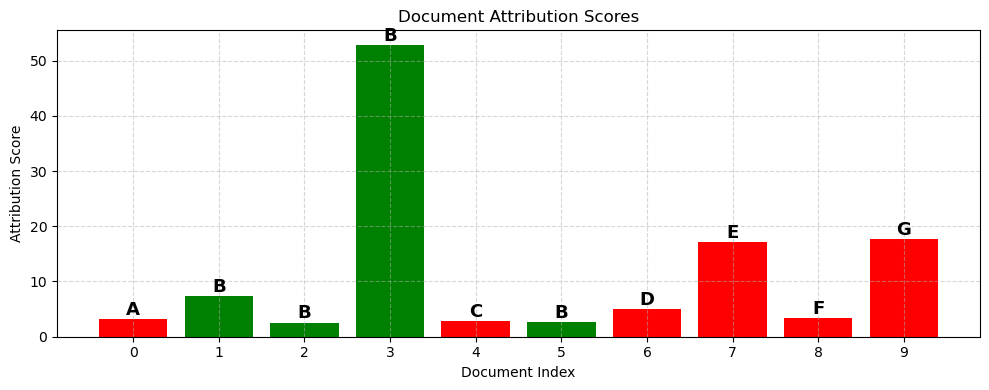

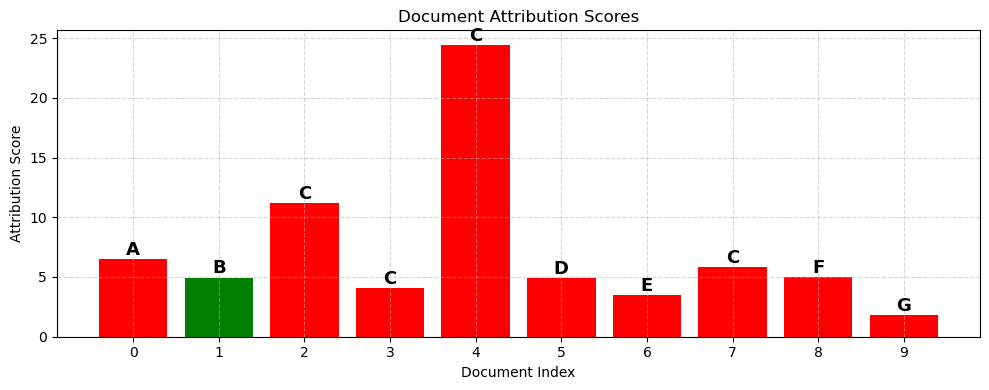

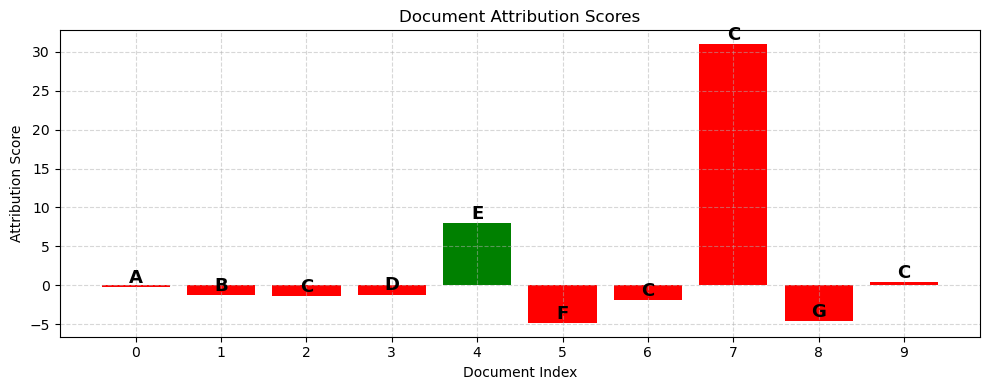

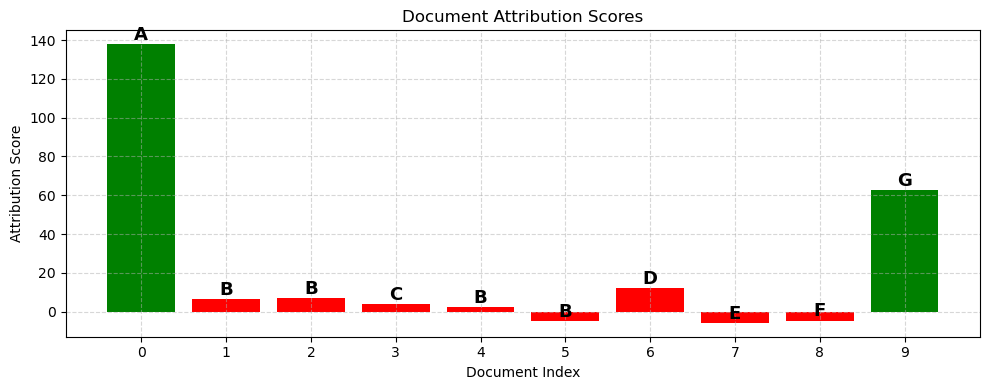

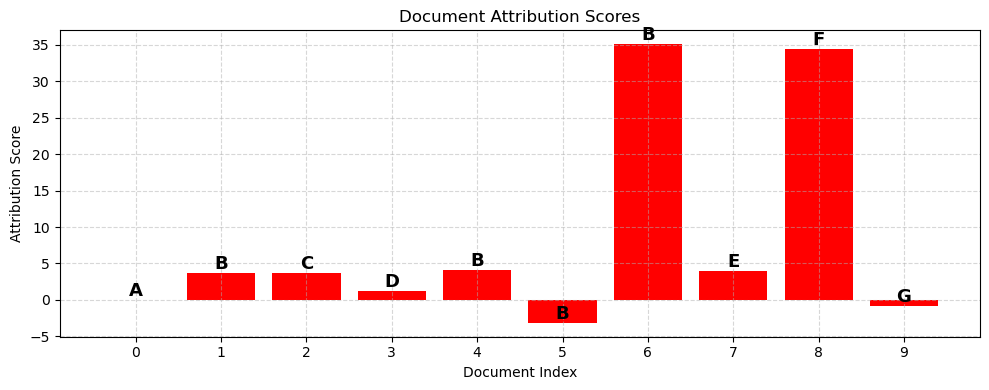

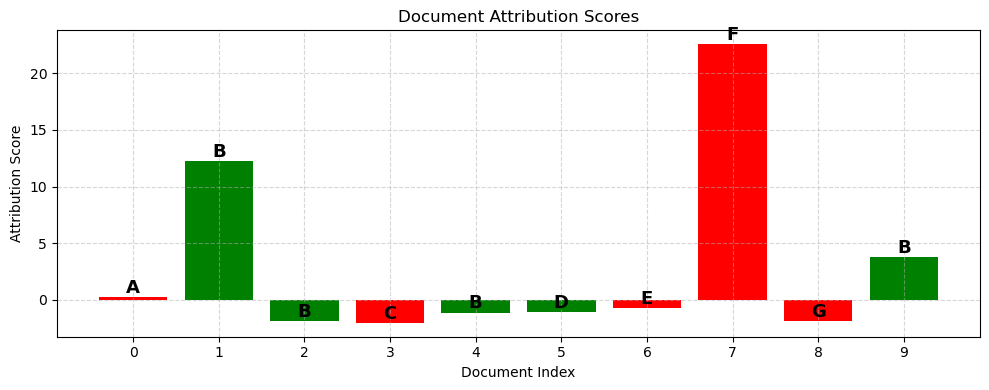

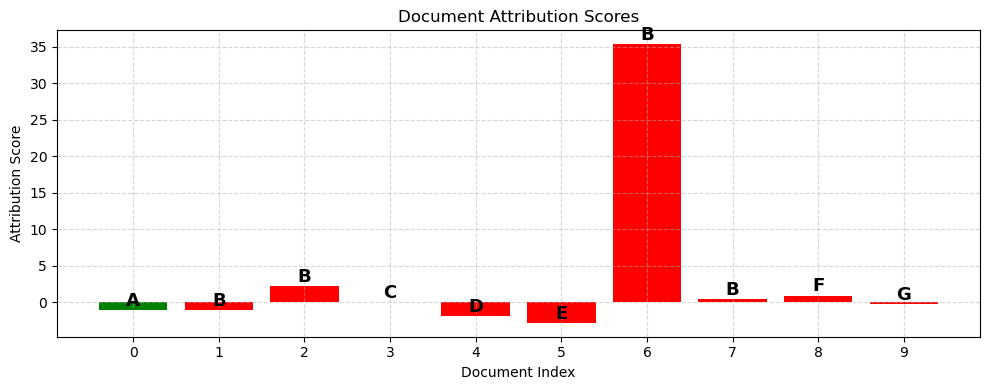

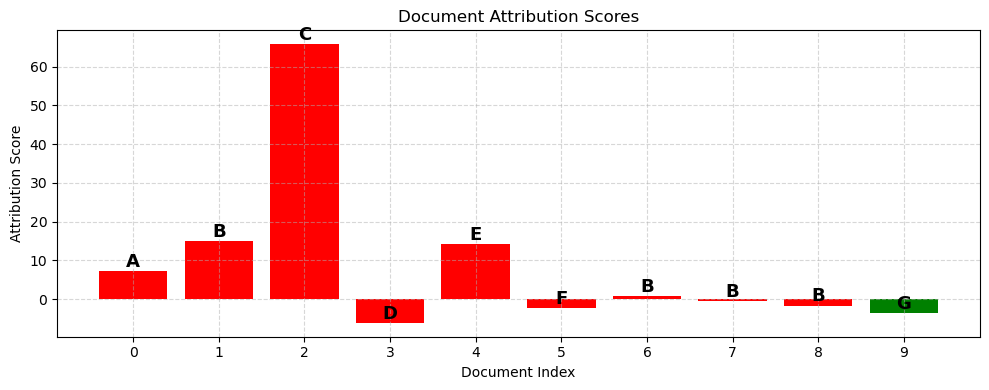

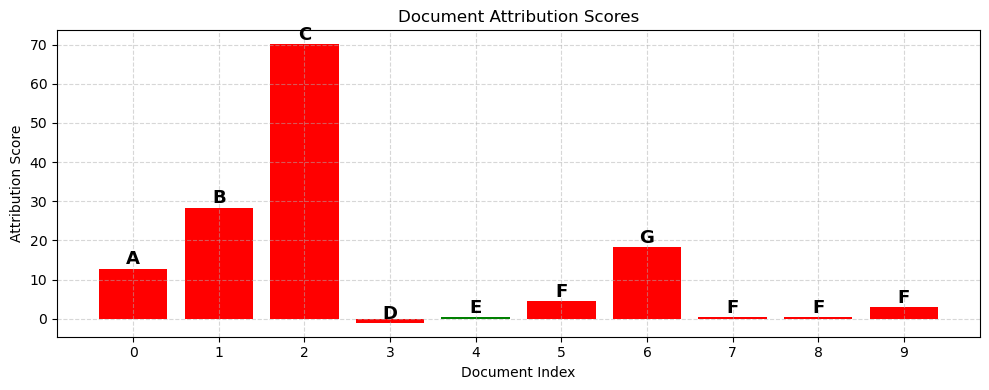

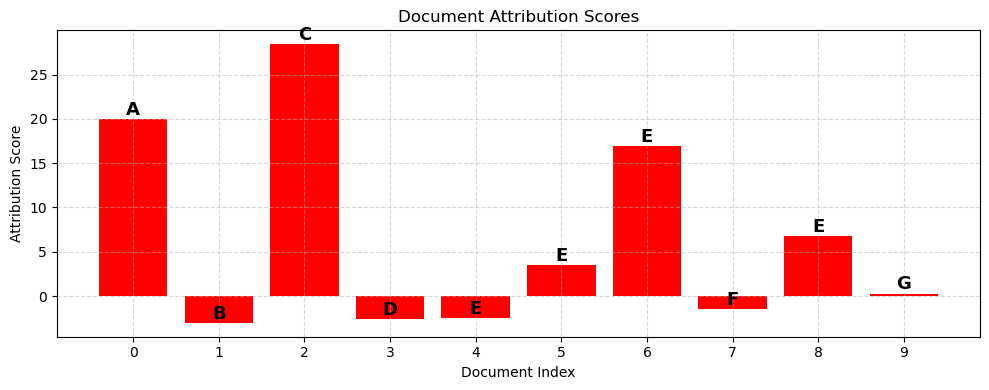

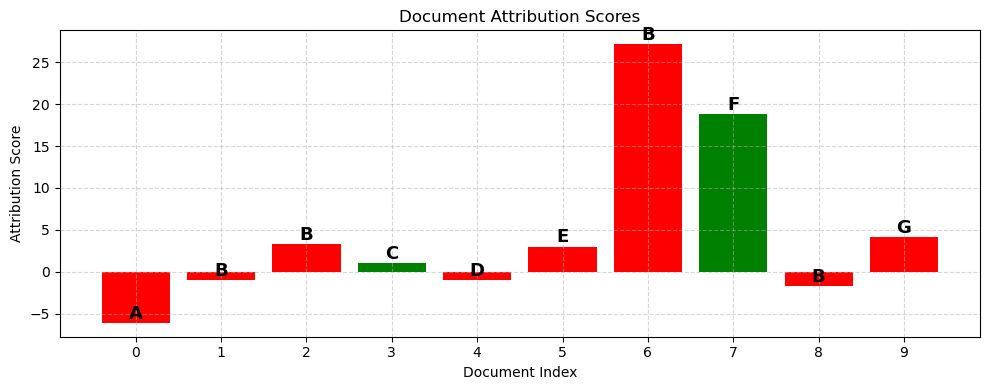

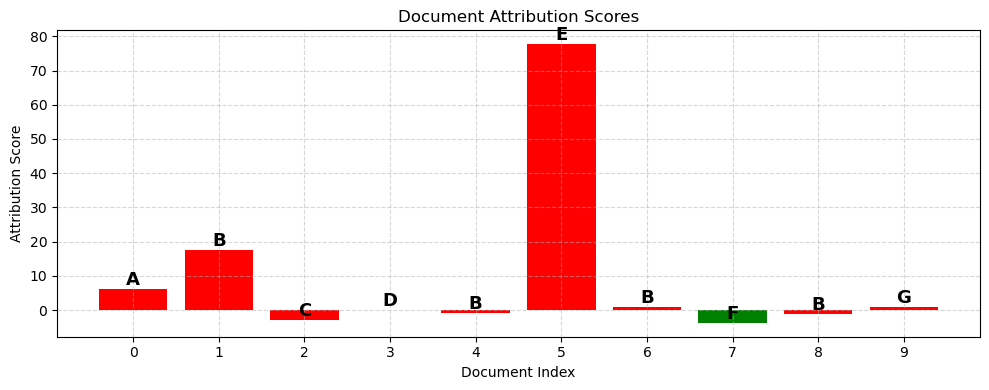

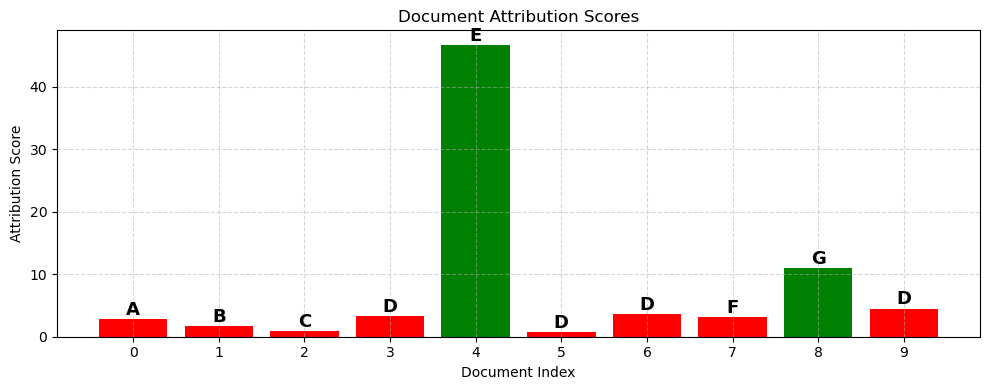

In [13]:
import string
def bar_plot(scores, flags, doc_lists) : 
    
    # Color by flag: green if 'P', red if 'N'
    colors = ['green' if flag == 'P' else 'red' for flag in flags]

    # Mapping for doc. identification
    unique_texts = {}
    letters = list(string.ascii_uppercase)
    text_labels = []

    letter_index = 0
    for text in doc_lists : 
        if text not in unique_texts: 
            unique_texts[text] = letters[letter_index]
            letter_index+=1
        text_labels.append(unique_texts[text])
    
    plt.figure(figsize=(10, 4))
    bars = plt.bar(range(len(scores)), scores, color=colors)
    plt.title(f"Document Attribution Scores")
    plt.xlabel("Document Index")
    plt.ylabel("Attribution Score")
    plt.xticks(range(len(scores)))
    plt.grid(True, linestyle='--', alpha=0.5)

    # Annotation
    for i, bar in enumerate(bars) : 
        height =  bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height+0.02,
                 text_labels[i], ha='center', va='bottom', fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()


for i, row in df_plot[["scores", "doc_flags", "doc_list"]].iterrows():
    scores = row['scores']
    flags = row['doc_flags']
    doc_list = row['doc_list']
    
    bar_plot(scores, flags, doc_list)